https://medium.com/@shabbirkamal2607/exploring-financial-markets-analyzing-historical-trends-and-predictive-models-for-d39c5d1cec9d

In [2]:
import pandas as pd
import random
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [3]:
crypto_df = pd.read_csv("./crypto_data.csv")
gold_df = pd.read_csv("./gold_price.csv")
stocks_df = pd.read_csv("./multiple_stocks_historical_data.csv")

In [4]:
crypto_df

timestamp  bitcoin_prices  ethereum_prices  tether_prices  \
0     2018-10-23     6512.589059       205.037755       0.994066   
1     2018-10-24     6472.799661       204.083946       0.990454   
2     2018-10-25     6481.443590       203.522199       0.991684   
3     2018-10-26     6458.191522       202.353023       0.991390   
4     2018-10-27     6468.826425       203.384969       0.992398   
...          ...             ...              ...            ...   
1820  2023-10-17    28513.309932      1601.232190       1.000625   
1821  2023-10-18    28417.721752      1565.060588       1.000426   
1822  2023-10-19    28328.245198      1564.071187       1.000212   
1823  2023-10-20    28715.748142      1568.374683       1.000694   
1824  2023-10-21    29677.392888      1603.909936       1.000260   

      binancecoin_prices  ripple_prices  usd-coin_prices  staked-ether_prices  \
0               9.823331       0.456776         1.020477                  NaN   
1               9.852828       0.463954         1.006845                  NaN   
2               9.764645       0.458798         1.009690                  NaN   
3               9.737861       0.460452         1.009330                  NaN   
4               9.756206       0.461605         1.015778                  NaN   
...                  ...            ...              ...                  ...   
1820          214.890354       0.498516         0.999726          1600.881606   
1821          211.617255       0.491718         0.999820          1563.071699   
1822          210.401838       0.487985         0.999961          1563.759722   
1823          211.294389       0.520081         1.001228          1566.913592   
1824          212.211694       0.516757         0.998868          1604.071929   

      solana_prices  cardano_prices  ...  tron_market_caps  \
0               NaN        0.076528  ...      1.578486e+09   
1               NaN        0.075001  ...      1.550291e+09   
2               NaN        0.074681  ...      1.549559e+09   
3               NaN        0.074324  ...      1.527774e+09   
4               NaN        0.074183  ...      1.560368e+09   
...             ...             ...  ...               ...   
1820      23.981382        0.251307  ...      7.908596e+09   
1821      23.971056        0.246493  ...      7.874388e+09   
1822      23.434058        0.242964  ...      7.929761e+09   
1823      24.942677        0.246949  ...      8.002259e+09   
1824      27.034558        0.251121  ...      8.064123e+09   

      the-open-network_market_caps  matic-network_market_caps  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              NaN                        NaN   
...                            ...                        ...   
1820                  6.770965e+09               4.971212e+09   
1821                  7.230441e+09               4.828663e+09   
1822                  7.056283e+09               4.750365e+09   
1823                  7.145036e+09               4.812683e+09   
1824                  7.179763e+09               4.993271e+09   

      polkadot_market_caps  wrapped-bitcoin_market_caps  \
0                      NaN                          NaN   
1                      NaN                          NaN   
2                      NaN                          NaN   
3                      NaN                          NaN   
4                      NaN                          NaN   
...                    ...                          ...   
1820          4.895207e+09                 4.640171e+09   
1821          4.725809e+09                 4.634564e+09   
1822          4.703093e+09                 4.610910e+09   
1823          4.696167e+09                 4.687283e+09   
1824          4.792336e+09                

In [5]:
stocks_df

Date        Open        High         Low       Close   Adj Close  \
0      2018-10-23   53.957500   55.812500   53.674999   55.682499   53.329006   
1      2018-10-24   55.650002   56.057499   53.634998   53.772499   51.499733   
2      2018-10-25   54.427502   55.345001   54.187500   54.950001   52.627472   
3      2018-10-26   53.974998   55.047501   53.167500   54.075001   51.789452   
4      2018-10-29   54.797501   54.922501   51.522499   53.060001   50.817356   
...           ...         ...         ...         ...         ...         ...   
17589  2023-10-16  109.089996  111.080002  108.949997  110.510002  110.510002   
17590  2023-10-17  108.809998  112.269997  108.019997  112.199997  112.199997   
17591  2023-10-18  111.059998  112.110001  110.029999  110.980003  110.980003   
17592  2023-10-19  112.389999  114.400002  110.839996  111.279999  111.279999   
17593  2023-10-20  111.519997  111.610001  108.629997  108.629997  108.629997   

          Volume Symbol  
0      155071200   AAPL  
1      163702000   AAPL  
2      119423200   AAPL  
3      189033600   AAPL  
4      183742000   AAPL  
...          ...    ...  
17589    6254700   QCOM  
17590    7334000   QCOM  
17591    7174500   QCOM  
17592   10511500   QCOM  
17593    7754600   QCOM  

[17594 rows x 8 columns]

In [6]:
gold_df

date    price
0     23/10/2018  1,236.0
1     24/10/2018  1,230.6
2     25/10/2018  1,230.8
3     26/10/2018  1,233.9
4     29/10/2018  1,230.8
...          ...      ...
1294  09/10/2023  1,845.5
1295  10/10/2023  1,857.0
1296  11/10/2023  1,871.3
1297  12/10/2023  1,874.0
1298  13/10/2023  1,909.2

[1299 rows x 2 columns]

## DATA CLEANING

In [7]:
stocks_df['Price'] = (stocks_df['High'] + stocks_df['Low']) / 2 #Add a new column 'price', which is average of high and low price

In [8]:
print(crypto_df.columns)

crypto_list = ["bitcoin_prices","ethereum_prices","tether_prices","binancecoin_prices","ripple_prices","bitcoin_total_volumes","ethereum_total_volumes","tether_total_volumes","binancecoin_total_volumes","ripple_total_volumes","bitcoin_market_caps","ethereum_market_caps","tether_market_caps","binancecoin_market_caps","ripple_market_caps"] #Using top 5 cryptocurrencies

Index(['timestamp', 'bitcoin_prices', 'ethereum_prices', 'tether_prices',
       'binancecoin_prices', 'ripple_prices', 'usd-coin_prices',
       'staked-ether_prices', 'solana_prices', 'cardano_prices',
       'dogecoin_prices', 'tron_prices', 'the-open-network_prices',
       'matic-network_prices', 'polkadot_prices', 'wrapped-bitcoin_prices',
       'chainlink_prices', 'litecoin_prices', 'bitcoin-cash_prices',
       'shiba-inu_prices', 'dai_prices', 'bitcoin_total_volumes',
       'ethereum_total_volumes', 'tether_total_volumes',
       'binancecoin_total_volumes', 'ripple_total_volumes',
       'usd-coin_total_volumes', 'staked-ether_total_volumes',
       'solana_total_volumes', 'cardano_total_volumes',
       'dogecoin_total_volumes', 'tron_total_volumes',
       'the-open-network_total_volumes', 'matic-network_total_volumes',
       'polkadot_total_volumes', 'wrapped-bitcoin_total_volumes',
       'chainlink_total_volumes', 'litecoin_total_volumes',
       'bitcoin-cash_total_v

In [9]:
unique_symbols = stocks_df['Symbol'].unique()

random.seed(5)
random.shuffle(unique_symbols)
selected_symbols = unique_symbols[:5] #Using 5 random stocks

### STOCKS

In [10]:
# Choose 5 random stocks for EDA and make a more cleaner, and understandable dataframe

#Select 5 random stocks
selected_stocks = stocks_df[stocks_df["Symbol"].isin(selected_symbols)].reset_index(drop=True)


#Make pivot table for volume
volume_data = selected_stocks.copy()
volume_data['Date'] = pd.to_datetime(volume_data['Date'])

pivot_volume = volume_data.pivot(index='Date', columns='Symbol', values='Volume').reset_index()

for column in pivot_volume.columns:
    if column not in ['Symbol', 'Date']:
        pivot_volume.rename(columns={column: column + '_volume'}, inplace=True)


#Make pivot table for price
price_data = selected_stocks.copy()
price_data['Date'] = pd.to_datetime(price_data['Date'])

pivot_price = price_data.pivot(index='Date', columns='Symbol', values='Price').reset_index()

for column in pivot_price.columns:
    if column not in ['Symbol', 'Date']:
        pivot_price.rename(columns={column: column + '_price'}, inplace=True)


#Merge both pivot tables
merged_stocks_data = pd.merge(pivot_price, pivot_volume, on='Date')
merged_stocks_data.set_index('Date', inplace=True)

#Save stocks dataframe as csv
merged_stocks_data.to_csv("./updated_stocks_data.csv")

In [11]:
#Update stock_df with new dataframe
stocks_df = pd.read_csv("./updated_stocks_data.csv")
stocks_df

Date  AMZN_price  GOOGL_price  HPQ_price   IBM_price  QCOM_price  \
0     2018-10-23   87.258499    54.925251  23.695000  124.431168   65.244999   
1     2018-10-24   85.856750    54.292000  23.530001  123.656788   64.445000   
2     2018-10-25   87.170502    54.834249  23.665000  120.903442   63.090000   
3     2018-10-26   82.536499    53.980749  23.240000  119.259083   62.410000   
4     2018-10-29   79.018501    52.900751  23.210000  115.798279   62.480000   
...          ...         ...          ...        ...         ...         ...   
1252  2023-10-16  131.750000   138.810005  26.825000  139.150002  110.014999   
1253  2023-10-17  130.645004   138.539993  26.955000  138.464996  110.144997   
1254  2023-10-18  129.090000   139.050003  27.030000  140.004997  111.070000   
1255  2023-10-19  129.855003   138.520004  26.725000  138.669998  112.619999   
1256  2023-10-20  126.570000   136.474998  26.275000  138.195000  110.119999   

      AMZN_volume  GOOGL_volume  HPQ_volume  IBM_volume  QCOM_volume  
0       134478000      37686000     9621900     6760926     13441000  
1       138568000      49286000    11420600     5972974     23384300  
2       205714000      72956000    11226200    10778298     20385700  
3       299276000     106438000    12369400     9170282     17049300  
4       277322000      81290000     9897300    21391118     14778300  
...           ...           ...         ...         ...          ...  
1252     42832900      28501900     6655300     3361500      6254700  
1253     49344600      23515800     7043500     4172800      7334000  
1254     42699500      23375000     9127000     3330000      7174500  
1255     60961400      26066000     7085300     5314200     10511500  
1256     56343300      26315200     6037100     4865300      7754600  

[1257 rows x 11 columns]

In [12]:
stocks_df.isna().sum()
null_rows = stocks_df[stocks_df.isnull().any(axis=1)]
null_rows #No null rows in stocks_df

Empty DataFrame
Columns: [Date, AMZN_price, GOOGL_price, HPQ_price, IBM_price, QCOM_price, AMZN_volume, GOOGL_volume, HPQ_volume, IBM_volume, QCOM_volume]
Index: []

In [13]:
#Rename column and timestamp as index
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df = stocks_df.rename(columns={'Date': 'timestamp'})
stocks_df.set_index('timestamp',inplace=True)
stocks_df

AMZN_price  GOOGL_price  HPQ_price   IBM_price  QCOM_price  \
timestamp                                                                
2018-10-23   87.258499    54.925251  23.695000  124.431168   65.244999   
2018-10-24   85.856750    54.292000  23.530001  123.656788   64.445000   
2018-10-25   87.170502    54.834249  23.665000  120.903442   63.090000   
2018-10-26   82.536499    53.980749  23.240000  119.259083   62.410000   
2018-10-29   79.018501    52.900751  23.210000  115.798279   62.480000   
...                ...          ...        ...         ...         ...   
2023-10-16  131.750000   138.810005  26.825000  139.150002  110.014999   
2023-10-17  130.645004   138.539993  26.955000  138.464996  110.144997   
2023-10-18  129.090000   139.050003  27.030000  140.004997  111.070000   
2023-10-19  129.855003   138.520004  26.725000  138.669998  112.619999   
2023-10-20  126.570000   136.474998  26.275000  138.195000  110.119999   

            AMZN_volume  GOOGL_volume  HPQ_volume  IBM_volume  QCOM_volume  
timestamp                                                                   
2018-10-23    134478000      37686000     9621900     6760926     13441000  
2018-10-24    138568000      49286000    11420600     5972974     23384300  
2018-10-25    205714000      72956000    11226200    10778298     20385700  
2018-10-26    299276000     106438000    12369400     9170282     17049300  
2018-10-29    277322000      81290000     9897300    21391118     14778300  
...                 ...           ...         ...         ...          ...  
2023-10-16     42832900      28501900     6655300     3361500      6254700  
2023-10-17     49344600      23515800     7043500     4172800      7334000  
2023-10-18     42699500      23375000     9127000     3330000      7174500  
2023-10-19     60961400      26066000     7085300     5314200     10511500  
2023-10-20     56343300      26315200     6037100     4865300      7754600  

[1257 rows x 10 columns]

### CRYPTO

In [14]:
crypto_df['timestamp'] = pd.to_datetime(crypto_df['timestamp'])
crypto_df.set_index('timestamp',inplace=True)
crypto_top5  = crypto_df.filter(crypto_list)
crypto_top5

bitcoin_prices  ethereum_prices  tether_prices  \
timestamp                                                    
2018-10-23     6512.589059       205.037755       0.994066   
2018-10-24     6472.799661       204.083946       0.990454   
2018-10-25     6481.443590       203.522199       0.991684   
2018-10-26     6458.191522       202.353023       0.991390   
2018-10-27     6468.826425       203.384969       0.992398   
...                    ...              ...            ...   
2023-10-17    28513.309932      1601.232190       1.000625   
2023-10-18    28417.721752      1565.060588       1.000426   
2023-10-19    28328.245198      1564.071187       1.000212   
2023-10-20    28715.748142      1568.374683       1.000694   
2023-10-21    29677.392888      1603.909936       1.000260   

            binancecoin_prices  ripple_prices  bitcoin_total_volumes  \
timestamp                                                              
2018-10-23            9.823331       0.456776           2.655160e+09   
2018-10-24            9.852828       0.463954           2.784381e+09   
2018-10-25            9.764645       0.458798           2.607022e+09   
2018-10-26            9.737861       0.460452           2.618534e+09   
2018-10-27            9.756206       0.461605           2.698017e+09   
...                        ...            ...                    ...   
2023-10-17          214.890354       0.498516           2.279280e+10   
2023-10-18          211.617255       0.491718           1.040325e+10   
2023-10-19          210.401838       0.487985           1.346103e+10   
2023-10-20          211.294389       0.520081           1.119392e+10   
2023-10-21          212.211694       0.516757           2.356141e+10   

            ethereum_total_volumes  tether_total_volumes  \
timestamp                                                  
2018-10-23            1.242296e+09          8.563883e+07   
2018-10-24            1.232759e+09          7.621999e+07   
2018-10-25            1.220613e+09          8.728164e+07   
2018-10-26            1.165396e+09          6.301214e+07   
2018-10-27            1.294284e+09          8.502300e+07   
...                            ...                   ...   
2023-10-17            1.488718e+10          3.645947e+10   
2023-10-18            7.529155e+09          1.691271e+10   
2023-10-19            7.161438e+09          1.832126e+10   
2023-10-20            8.131899e+09          1.848936e+10   
2023-10-21            1.073951e+10          2.849213e+10   

            binancecoin_total_volumes  ripple_total_volumes  \
timestamp                                                     
2018-10-23               2.216240e+07          3.175394e+08   
2018-10-24               2.946940e+07          6.467542e+08   
2018-10-25               2.579697e+07          5.203794e+08   
2018-10-26               2.151130e+07          4.451810e+08   
2018-10-27               2.105856e+07          3.962543e+08   
...                               ...                   ...   
2023-10-17               6.943125e+08          1.173129e+09   
2023-10-18               3.602050e+08          7.082065e+08   
2023-10-19               2.672026e+08          6.698953e+08   
2023-10-20               2.889531e+08          1.520132e+09   
2023-10-21               3.863251e+08          1.454959e+09   

            bitcoin_market_caps  ethereum_market_caps  tether_market_caps  \
timestamp                                                                   
2018-10-23         1.129059e+11          2.106546e+10        2.770816e+09   
2018-10-24         1.122279e+11          2.097127e+10        2.087254e+09   
2018-10-25         1.123631e+11          2.091520e+10        2.039936e+09   
2018-10-26         1.120101e+11          2.080663e+10        2.040926e+09   
2018-10-27         1.122008e+11          2.091262e+10        2.041780e+09   
...                         ...                   ...                 ...   
2023-10-17         5.553388e+11          1.923180e+

In [15]:
# Rename columns
updated_names = {"bitcoin_prices": "bitcoin_price", "ethereum_prices": "ethereum_price", "tether_prices": "tether_price", "binancecoin_prices": "binancecoin_price", "ripple_prices": "ripple_price", "bitcoin_total_volumes": "bitcoin_total_volume", "ethereum_total_volumes": "ethereum_total_volume", "tether_total_volumes": "tether_total_volume", "binancecoin_total_volumes": "binancecoin_total_volume", "ripple_total_volumes": "ripple_total_volume", "bitcoin_market_caps": "bitcoin_market_cap", "ethereum_market_caps": "ethereum_market_cap", "tether_market_caps": "tether_market_cap", "binancecoin_market_caps": "binancecoin_market_cap", "ripple_market_caps": "ripple_market_cap"}

crypto_top5 = crypto_top5.rename(columns=updated_names)

In [16]:
crypto_top5.isna().sum() #Few null values

bitcoin_price               0
ethereum_price              0
tether_price                1
binancecoin_price           0
ripple_price                0
bitcoin_total_volume        0
ethereum_total_volume       0
tether_total_volume         1
binancecoin_total_volume    0
ripple_total_volume         0
bitcoin_market_cap          0
ethereum_market_cap         0
tether_market_cap           1
binancecoin_market_cap      0
ripple_market_cap           0
dtype: int64

In [17]:
crypto_top5 = crypto_top5.interpolate() #To cater to null values

crypto_top5.isna().sum()
null_rows = crypto_top5[crypto_top5.isnull().any(axis=1)]
null_rows #No null values

Empty DataFrame
Columns: [bitcoin_price, ethereum_price, tether_price, binancecoin_price, ripple_price, bitcoin_total_volume, ethereum_total_volume, tether_total_volume, binancecoin_total_volume, ripple_total_volume, bitcoin_market_cap, ethereum_market_cap, tether_market_cap, binancecoin_market_cap, ripple_market_cap]
Index: []

In [18]:
crypto_top5


bitcoin_price  ethereum_price  tether_price  binancecoin_price  \
timestamp                                                                    
2018-10-23    6512.589059      205.037755      0.994066           9.823331   
2018-10-24    6472.799661      204.083946      0.990454           9.852828   
2018-10-25    6481.443590      203.522199      0.991684           9.764645   
2018-10-26    6458.191522      202.353023      0.991390           9.737861   
2018-10-27    6468.826425      203.384969      0.992398           9.756206   
...                   ...             ...           ...                ...   
2023-10-17   28513.309932     1601.232190      1.000625         214.890354   
2023-10-18   28417.721752     1565.060588      1.000426         211.617255   
2023-10-19   28328.245198     1564.071187      1.000212         210.401838   
2023-10-20   28715.748142     1568.374683      1.000694         211.294389   
2023-10-21   29677.392888     1603.909936      1.000260         212.211694   

            ripple_price  bitcoin_total_volume  ethereum_total_volume  \
timestamp                                                               
2018-10-23      0.456776          2.655160e+09           1.242296e+09   
2018-10-24      0.463954          2.784381e+09           1.232759e+09   
2018-10-25      0.458798          2.607022e+09           1.220613e+09   
2018-10-26      0.460452          2.618534e+09           1.165396e+09   
2018-10-27      0.461605          2.698017e+09           1.294284e+09   
...                  ...                   ...                    ...   
2023-10-17      0.498516          2.279280e+10           1.488718e+10   
2023-10-18      0.491718          1.040325e+10           7.529155e+09   
2023-10-19      0.487985          1.346103e+10           7.161438e+09   
2023-10-20      0.520081          1.119392e+10           8.131899e+09   
2023-10-21      0.516757          2.356141e+10           1.073951e+10   

            tether_total_volume  binancecoin_total_volume  \
timestamp                                                   
2018-10-23         8.563883e+07              2.216240e+07   
2018-10-24         7.621999e+07              2.946940e+07   
2018-10-25         8.728164e+07              2.579697e+07   
2018-10-26         6.301214e+07              2.151130e+07   
2018-10-27         8.502300e+07              2.105856e+07   
...                         ...                       ...   
2023-10-17         3.645947e+10              6.943125e+08   
2023-10-18         1.691271e+10              3.602050e+08   
2023-10-19         1.832126e+10              2.672026e+08   
2023-10-20         1.848936e+10              2.889531e+08   
2023-10-21         2.849213e+10              3.863251e+08   

            ripple_total_volume  bitcoin_market_cap  ethereum_market_cap  \
timestamp                                                                  
2018-10-23         3.175394e+08        1.129059e+11         2.106546e+10   
2018-10-24         6.467542e+08        1.122279e+11         2.097127e+10   
2018-10-25         5.203794e+08        1.123631e+11         2.091520e+10   
2018-10-26         4.451810e+08        1.120101e+11         2.080663e+10   
2018-10-27         3.962543e+08        1.122008e+11         2.091262e+10   
...                         ...                 ...                  ...   
2023-10-17         1.173129e+09        5.553388e+11         1.923180e+11   
2023-10-18         7.082065e+08        5.550031e+11         1.882456e+11   
2023-10-19         6.698953e+08        5.533111e+11         1.881822e+11   
2023-10-20         1.520132e+09        5.593640e+11         1.883007e+11   
2023-10-21         1.454959e+09        5.795368e+11         1.929646e+11   

            tether_market_cap  binancecoin_market_cap  ripple_market_cap  
timestamp                                                                 
2018-10-23       2.770816e+09            1.418914e+09       1.826996e+10  
2018-10-24       2.087254e+09          

### GOLD

In [19]:
gold_df.isna().sum()
null_rows = gold_df[gold_df.isnull().any(axis=1)]
null_rows #No null rows

Empty DataFrame
Columns: [date, price]
Index: []

In [20]:
gold_df['date']= pd.to_datetime(gold_df['date'].str.replace('/', '-'), dayfirst=True)
gold_df = gold_df.rename(columns={'date': 'timestamp','price':'gold_price'})
gold_df.set_index('timestamp',inplace=True)
gold_df['gold_price'] = gold_df['gold_price'].apply(lambda x: float(x.replace(',', '')))

In [21]:
gold_df

gold_price
timestamp             
2018-10-23      1236.0
2018-10-24      1230.6
2018-10-25      1230.8
2018-10-26      1233.9
2018-10-29      1230.8
...                ...
2023-10-09      1845.5
2023-10-10      1857.0
2023-10-11      1871.3
2023-10-12      1874.0
2023-10-13      1909.2

[1299 rows x 1 columns]

## DATA MERGING

In [22]:
result = pd.merge(crypto_top5, pd.merge(stocks_df, gold_df, left_index=True, right_index=True, how='left'), left_index=True, right_index=True, how='left')
result = result.infer_objects()
result

bitcoin_price  ethereum_price  tether_price  binancecoin_price  \
timestamp                                                                    
2018-10-23    6512.589059      205.037755      0.994066           9.823331   
2018-10-24    6472.799661      204.083946      0.990454           9.852828   
2018-10-25    6481.443590      203.522199      0.991684           9.764645   
2018-10-26    6458.191522      202.353023      0.991390           9.737861   
2018-10-27    6468.826425      203.384969      0.992398           9.756206   
...                   ...             ...           ...                ...   
2023-10-17   28513.309932     1601.232190      1.000625         214.890354   
2023-10-18   28417.721752     1565.060588      1.000426         211.617255   
2023-10-19   28328.245198     1564.071187      1.000212         210.401838   
2023-10-20   28715.748142     1568.374683      1.000694         211.294389   
2023-10-21   29677.392888     1603.909936      1.000260         212.211694   

            ripple_price  bitcoin_total_volume  ethereum_total_volume  \
timestamp                                                               
2018-10-23      0.456776          2.655160e+09           1.242296e+09   
2018-10-24      0.463954          2.784381e+09           1.232759e+09   
2018-10-25      0.458798          2.607022e+09           1.220613e+09   
2018-10-26      0.460452          2.618534e+09           1.165396e+09   
2018-10-27      0.461605          2.698017e+09           1.294284e+09   
...                  ...                   ...                    ...   
2023-10-17      0.498516          2.279280e+10           1.488718e+10   
2023-10-18      0.491718          1.040325e+10           7.529155e+09   
2023-10-19      0.487985          1.346103e+10           7.161438e+09   
2023-10-20      0.520081          1.119392e+10           8.131899e+09   
2023-10-21      0.516757          2.356141e+10           1.073951e+10   

            tether_total_volume  binancecoin_total_volume  \
timestamp                                                   
2018-10-23         8.563883e+07              2.216240e+07   
2018-10-24         7.621999e+07              2.946940e+07   
2018-10-25         8.728164e+07              2.579697e+07   
2018-10-26         6.301214e+07              2.151130e+07   
2018-10-27         8.502300e+07              2.105856e+07   
...                         ...                       ...   
2023-10-17         3.645947e+10              6.943125e+08   
2023-10-18         1.691271e+10              3.602050e+08   
2023-10-19         1.832126e+10              2.672026e+08   
2023-10-20         1.848936e+10              2.889531e+08   
2023-10-21         2.849213e+10              3.863251e+08   

            ripple_total_volume  ...  GOOGL_price  HPQ_price   IBM_price  \
timestamp                        ...                                       
2018-10-23         3.175394e+08  ...    54.925251  23.695000  124.431168   
2018-10-24         6.467542e+08  ...    54.292000  23.530001  123.656788   
2018-10-25         5.203794e+08  ...    54.834249  23.665000  120.903442   
2018-10-26         4.451810e+08  ...    53.980749  23.240000  119.259083   
2018-10-27         3.962543e+08  ...          NaN        NaN         NaN   
...                         ...  ...          ...        ...         ...   
2023-10-17         1.173129e+09  ...   138.539993  26.955000  138.464996   
2023-10-18         7.082065e+08  ...   139.050003  27.030000  140.004997   
2023-10-19         6.698953e+08  ...   138.520004  26.725000  138.669998   
2023-10-20         1.520132e+09  ...   136.474998  26.275000  138.195000   
2023-10-21         1.454959e+09  ...          NaN        NaN         NaN   

            QCOM_price  AMZN_volume  GOOGL_volume  HPQ_volume  IBM_volume  \
timestamp                                                                   
2018-10-23   65.244999  134478000.0    37686000.0   9621900.0   6760926.0   
2018-10-24   64.445000  138568000

In [23]:
result.isna().sum()

bitcoin_price                 0
ethereum_price                0
tether_price                  0
binancecoin_price             0
ripple_price                  0
bitcoin_total_volume          0
ethereum_total_volume         0
tether_total_volume           0
binancecoin_total_volume      0
ripple_total_volume           0
bitcoin_market_cap            0
ethereum_market_cap           0
tether_market_cap             0
binancecoin_market_cap        0
ripple_market_cap             0
AMZN_price                  568
GOOGL_price                 568
HPQ_price                   568
IBM_price                   568
QCOM_price                  568
AMZN_volume                 568
GOOGL_volume                568
HPQ_volume                  568
IBM_volume                  568
QCOM_volume                 568
gold_price                  573
dtype: int64

In [24]:
result = result.fillna(method='ffill')
result.isna().sum()
null_rows = result[result.isnull().any(axis=1)]
null_rows #No null values

Empty DataFrame
Columns: [bitcoin_price, ethereum_price, tether_price, binancecoin_price, ripple_price, bitcoin_total_volume, ethereum_total_volume, tether_total_volume, binancecoin_total_volume, ripple_total_volume, bitcoin_market_cap, ethereum_market_cap, tether_market_cap, binancecoin_market_cap, ripple_market_cap, AMZN_price, GOOGL_price, HPQ_price, IBM_price, QCOM_price, AMZN_volume, GOOGL_volume, HPQ_volume, IBM_volume, QCOM_volume, gold_price]
Index: []

[0 rows x 26 columns]

In [25]:
final_df = result
final_df

bitcoin_price  ethereum_price  tether_price  binancecoin_price  \
timestamp                                                                    
2018-10-23    6512.589059      205.037755      0.994066           9.823331   
2018-10-24    6472.799661      204.083946      0.990454           9.852828   
2018-10-25    6481.443590      203.522199      0.991684           9.764645   
2018-10-26    6458.191522      202.353023      0.991390           9.737861   
2018-10-27    6468.826425      203.384969      0.992398           9.756206   
...                   ...             ...           ...                ...   
2023-10-17   28513.309932     1601.232190      1.000625         214.890354   
2023-10-18   28417.721752     1565.060588      1.000426         211.617255   
2023-10-19   28328.245198     1564.071187      1.000212         210.401838   
2023-10-20   28715.748142     1568.374683      1.000694         211.294389   
2023-10-21   29677.392888     1603.909936      1.000260         212.211694   

            ripple_price  bitcoin_total_volume  ethereum_total_volume  \
timestamp                                                               
2018-10-23      0.456776          2.655160e+09           1.242296e+09   
2018-10-24      0.463954          2.784381e+09           1.232759e+09   
2018-10-25      0.458798          2.607022e+09           1.220613e+09   
2018-10-26      0.460452          2.618534e+09           1.165396e+09   
2018-10-27      0.461605          2.698017e+09           1.294284e+09   
...                  ...                   ...                    ...   
2023-10-17      0.498516          2.279280e+10           1.488718e+10   
2023-10-18      0.491718          1.040325e+10           7.529155e+09   
2023-10-19      0.487985          1.346103e+10           7.161438e+09   
2023-10-20      0.520081          1.119392e+10           8.131899e+09   
2023-10-21      0.516757          2.356141e+10           1.073951e+10   

            tether_total_volume  binancecoin_total_volume  \
timestamp                                                   
2018-10-23         8.563883e+07              2.216240e+07   
2018-10-24         7.621999e+07              2.946940e+07   
2018-10-25         8.728164e+07              2.579697e+07   
2018-10-26         6.301214e+07              2.151130e+07   
2018-10-27         8.502300e+07              2.105856e+07   
...                         ...                       ...   
2023-10-17         3.645947e+10              6.943125e+08   
2023-10-18         1.691271e+10              3.602050e+08   
2023-10-19         1.832126e+10              2.672026e+08   
2023-10-20         1.848936e+10              2.889531e+08   
2023-10-21         2.849213e+10              3.863251e+08   

            ripple_total_volume  ...  GOOGL_price  HPQ_price   IBM_price  \
timestamp                        ...                                       
2018-10-23         3.175394e+08  ...    54.925251  23.695000  124.431168   
2018-10-24         6.467542e+08  ...    54.292000  23.530001  123.656788   
2018-10-25         5.203794e+08  ...    54.834249  23.665000  120.903442   
2018-10-26         4.451810e+08  ...    53.980749  23.240000  119.259083   
2018-10-27         3.962543e+08  ...    53.980749  23.240000  119.259083   
...                         ...  ...          ...        ...         ...   
2023-10-17         1.173129e+09  ...   138.539993  26.955000  138.464996   
2023-10-18         7.082065e+08  ...   139.050003  27.030000  140.004997   
2023-10-19         6.698953e+08  ...   138.520004  26.725000  138.669998   
2023-10-20         1.520132e+09  ...   136.474998  26.275000  138.195000   
2023-10-21         1.454959e+09  ...   136.474998  26.275000  138.195000   

            QCOM_price  AMZN_volume  GOOGL_volume  HPQ_volume  IBM_volume  \
timestamp                                                                   
2018-10-23   65.244999  134478000.0    37686000.0   9621900.0   6760926.0   
2018-10-24   64.445000  138568000

In [26]:
# final_df.to_csv("ds_project_data.csv")

## DATA ANALYSIS

In [27]:
crypto_top5.describe()

bitcoin_price  ethereum_price  tether_price  binancecoin_price  \
count    1825.000000     1825.000000   1825.000000        1825.000000   
mean    23277.626736     1335.398312      1.000474         192.829456   
std     16255.549271     1184.696110      0.002716         178.027269   
min      3216.627150       83.785962      0.975542           4.470332   
25%      9234.314675      211.689048      0.999657          20.106983   
50%     20153.975978     1281.210637      1.000378         217.015865   
75%     33928.134218     1899.147312      1.001396         314.111739   
max     67617.015545     4815.004634      1.015651         675.098974   

       ripple_price  bitcoin_total_volume  ethereum_total_volume  \
count   1825.000000          1.825000e+03           1.825000e+03   
mean       0.483914          2.818111e+10           1.488412e+10   
std        0.285931          1.766570e+10           1.287519e+10   
min        0.137830          4.048064e+08           9.774164e+08   
25%        0.292286          1.728114e+10           7.218078e+09   
50%        0.390636          2.470791e+10           1.121402e+10   
75%        0.570529          3.600709e+10           1.821092e+10   
max        1.837677          1.788941e+11           1.409065e+11   

       tether_total_volume  binancecoin_total_volume  ripple_total_volume  \
count         1.825000e+03              1.825000e+03         1.825000e+03   
mean          4.561380e+10              1.063483e+09         2.874799e+09   
std           4.472781e+10              1.609435e+09         3.805814e+09   
min           3.441250e+07              7.692710e+06         2.270401e+08   
25%           2.292152e+10              2.428947e+08         1.121924e+09   
50%           3.763610e+10              4.651874e+08         1.785716e+09   
75%           5.725533e+10              1.285526e+09         3.089519e+09   
max           9.267677e+11              2.210352e+10         6.246813e+10   

       bitcoin_market_cap  ethereum_market_cap  tether_market_cap  \
count        1.825000e+03         1.825000e+03       1.825000e+03   
mean         4.386562e+11         1.576720e+11       4.133776e+10   
std          3.084716e+11         1.410975e+11       3.296358e+10   
min          5.599852e+10         8.696897e+09       2.006976e+09   
25%          1.687604e+11         2.294329e+10       4.289228e+09   
50%          3.854626e+11         1.537871e+11       4.917628e+10   
75%          6.321857e+11         2.271875e+11       7.135497e+10   
max          1.278798e+12         5.716658e+11       8.396702e+10   

       binancecoin_market_cap  ripple_market_cap  
count            1.825000e+03       1.825000e+03  
mean             3.082761e+10       2.270002e+10  
std              2.898792e+10       1.368548e+10  
min              6.459512e+08       6.028785e+09  
25%              3.060607e+09       1.258068e+10  
50%              3.355798e+10       1.874363e+10  
75%              4.971080e+10       2.770408e+10  
max              1.104412e+11       8.438906e+10

In [28]:
stocks_df.describe()

AMZN_price  GOOGL_price    HPQ_price    IBM_price   QCOM_price  \
count  1257.000000  1257.000000  1257.000000  1257.000000  1257.000000   
mean    125.249427    95.131945    26.037991   128.762407   113.058978   
std      32.315204    30.024799     6.504043    10.073090    33.843290   
min      67.575748    49.744499    13.365000    90.009560    49.635000   
25%      93.805000    65.512001    19.935000   120.935001    83.465000   
50%     122.591499    95.005001    26.825000   129.526772   118.075001   
75%     158.112747   120.920002    30.545000   135.936897   137.235001   
max     186.351997   149.932755    40.085001   151.580002   189.154999   

        AMZN_volume  GOOGL_volume    HPQ_volume    IBM_volume   QCOM_volume  
count  1.257000e+03  1.257000e+03  1.257000e+03  1.257000e+03  1.257000e+03  
mean   7.973152e+07  3.419759e+07  1.043770e+07  5.086504e+06  1.033544e+07  
std    3.749875e+07  1.533657e+07  6.174985e+06  3.177280e+06  7.539478e+06  
min    1.762600e+07  9.312000e+06  2.309800e+06  1.257397e+06  2.120200e+06  
25%    5.492600e+07  2.447000e+07  6.996800e+06  3.371049e+06  6.712300e+06  
50%    6.794400e+07  3.046780e+07  8.950500e+06  4.292800e+06  8.542800e+06  
75%    9.338200e+07  3.870200e+07  1.213520e+07  5.647249e+06  1.173320e+07  
max    3.113460e+08  1.331780e+08  9.445520e+07  3.981442e+07  1.560193e+08

In [29]:
gold_df.describe()

gold_price
count  1299.000000
mean   1710.406467
std     220.864995
min    1202.100000
25%    1552.300000
50%    1783.200000
75%    1875.000000
max    2067.200000

In [30]:
final_df.describe()

bitcoin_price  ethereum_price  tether_price  binancecoin_price  \
count    1825.000000     1825.000000   1825.000000        1825.000000   
mean    23277.626736     1335.398312      1.000474         192.829456   
std     16255.549271     1184.696110      0.002716         178.027269   
min      3216.627150       83.785962      0.975542           4.470332   
25%      9234.314675      211.689048      0.999657          20.106983   
50%     20153.975978     1281.210637      1.000378         217.015865   
75%     33928.134218     1899.147312      1.001396         314.111739   
max     67617.015545     4815.004634      1.015651         675.098974   

       ripple_price  bitcoin_total_volume  ethereum_total_volume  \
count   1825.000000          1.825000e+03           1.825000e+03   
mean       0.483914          2.818111e+10           1.488412e+10   
std        0.285931          1.766570e+10           1.287519e+10   
min        0.137830          4.048064e+08           9.774164e+08   
25%        0.292286          1.728114e+10           7.218078e+09   
50%        0.390636          2.470791e+10           1.121402e+10   
75%        0.570529          3.600709e+10           1.821092e+10   
max        1.837677          1.788941e+11           1.409065e+11   

       tether_total_volume  binancecoin_total_volume  ripple_total_volume  \
count         1.825000e+03              1.825000e+03         1.825000e+03   
mean          4.561380e+10              1.063483e+09         2.874799e+09   
std           4.472781e+10              1.609435e+09         3.805814e+09   
min           3.441250e+07              7.692710e+06         2.270401e+08   
25%           2.292152e+10              2.428947e+08         1.121924e+09   
50%           3.763610e+10              4.651874e+08         1.785716e+09   
75%           5.725533e+10              1.285526e+09         3.089519e+09   
max           9.267677e+11              2.210352e+10         6.246813e+10   

       ...  GOOGL_price    HPQ_price    IBM_price   QCOM_price   AMZN_volume  \
count  ...  1825.000000  1825.000000  1825.000000  1825.000000  1.825000e+03   
mean   ...    95.031022    26.045921   128.718549   113.020389  8.176060e+07   
std    ...    29.986064     6.493234    10.125306    33.906018  4.048089e+07   
min    ...    49.744499    13.365000    90.009560    49.635000  1.762600e+07   
25%    ...    65.465748    19.980000   120.865200    83.465000  5.503400e+07   
50%    ...    94.785000    26.730000   129.359467   117.764999  6.890000e+07   
75%    ...   120.808998    30.580000   136.009995   137.489998  9.684400e+07   
max    ...   149.932755    40.085001   151.580002   189.154999  3.113460e+08   

       GOOGL_volume    HPQ_volume    IBM_volume   QCOM_volume   gold_price  
count  1.825000e+03  1.825000e+03  1.825000e+03  1.825000e+03  1825.000000  
mean   3.466194e+07  1.067022e+07  5.154587e+06  1.042131e+07  1711.180548  
std    1.560681e+07  6.578648e+06  3.396077e+06  7.233162e+06   220.577924  
min    9.312000e+06  2.309800e+06  1.257397e+06  2.120200e+06  1202.100000  
25%    2.472800e+07  6.968200e+06  3.349920e+06  6.625400e+06  1553.600000  
50%    3.084810e+07  8.950500e+06  4.308369e+06  8.600700e+06  1782.200000  
75%    3.995800e+07  1.233050e+07  5.823710e+06  1.202430e+07  1876.100000  
max    1.331780e+08  9.445520e+07  3.981442e+07  1.560193e+08  2067.200000  

[8 rows x 26 columns]

In [31]:
crypto_cm = crypto_top5.corr()
stocks_cm = stocks_df.corr()
gold_cm = gold_df.corr()

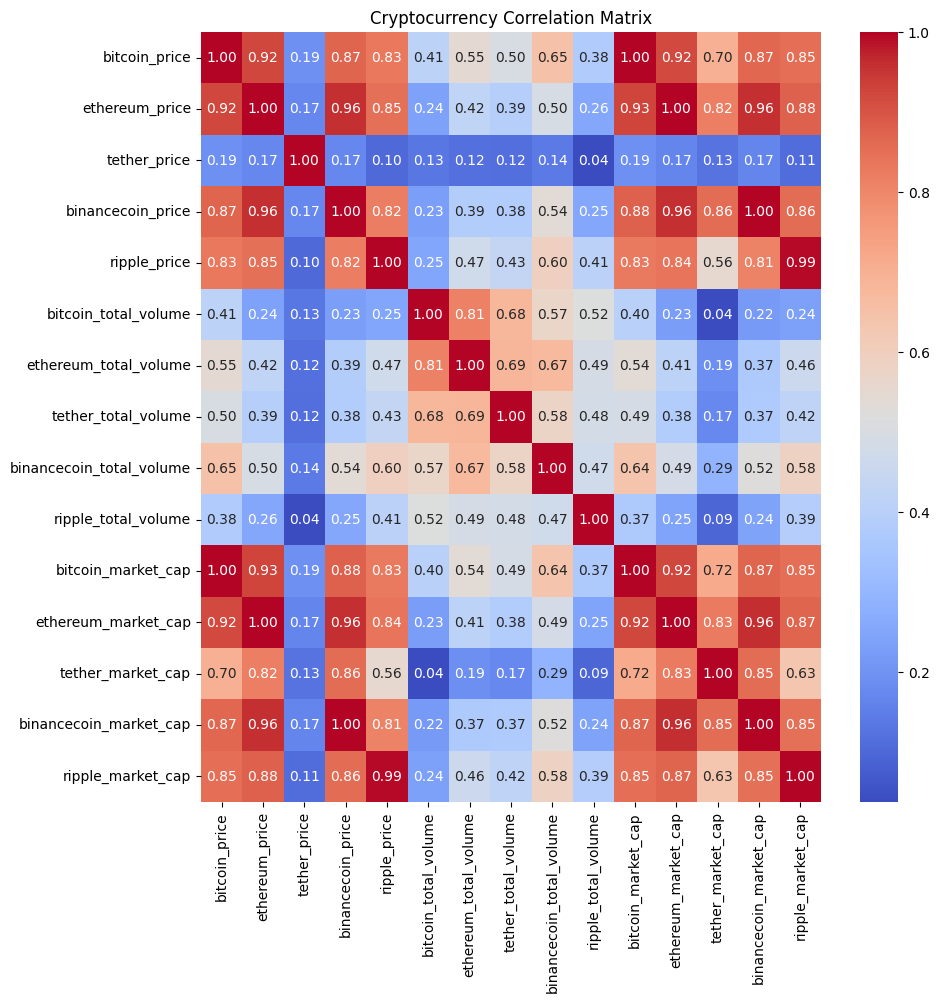

In [32]:
#Crypto Correlation Matrix
plt.figure(figsize=(10, 10))

sns.heatmap(crypto_cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cryptocurrency Correlation Matrix')
plt.show()

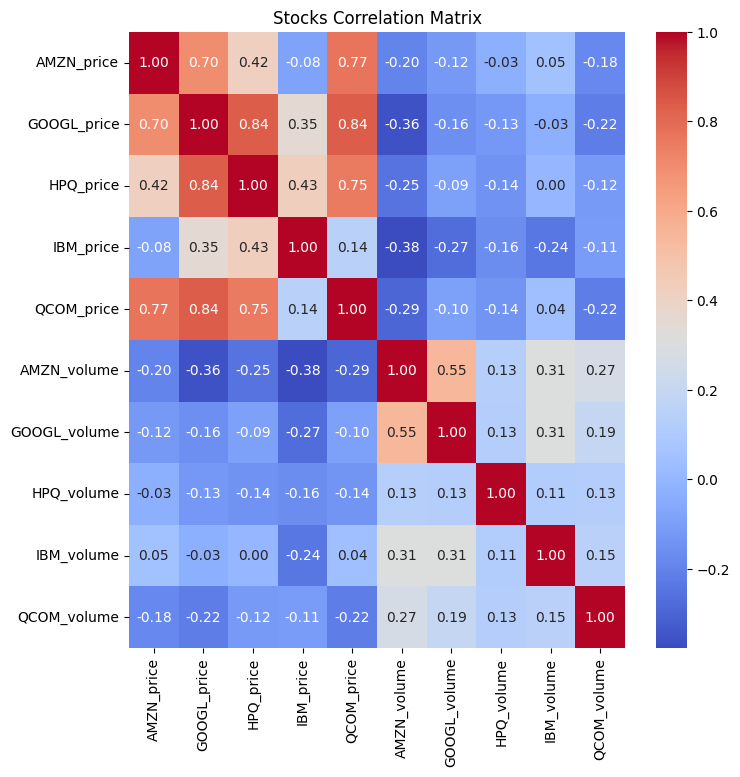

In [33]:
#Stocks Correlation Matrix
plt.figure(figsize=(8, 8))

sns.heatmap(stocks_cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Stocks Correlation Matrix')
plt.show()

In [34]:
price_columns = [col for col in final_df.columns if 'price' in col]

price_df = final_df[price_columns]
price_df

bitcoin_price  ethereum_price  tether_price  binancecoin_price  \
timestamp                                                                    
2018-10-23    6512.589059      205.037755      0.994066           9.823331   
2018-10-24    6472.799661      204.083946      0.990454           9.852828   
2018-10-25    6481.443590      203.522199      0.991684           9.764645   
2018-10-26    6458.191522      202.353023      0.991390           9.737861   
2018-10-27    6468.826425      203.384969      0.992398           9.756206   
...                   ...             ...           ...                ...   
2023-10-17   28513.309932     1601.232190      1.000625         214.890354   
2023-10-18   28417.721752     1565.060588      1.000426         211.617255   
2023-10-19   28328.245198     1564.071187      1.000212         210.401838   
2023-10-20   28715.748142     1568.374683      1.000694         211.294389   
2023-10-21   29677.392888     1603.909936      1.000260         212.211694   

            ripple_price  AMZN_price  GOOGL_price  HPQ_price   IBM_price  \
timestamp                                                                  
2018-10-23      0.456776   87.258499    54.925251  23.695000  124.431168   
2018-10-24      0.463954   85.856750    54.292000  23.530001  123.656788   
2018-10-25      0.458798   87.170502    54.834249  23.665000  120.903442   
2018-10-26      0.460452   82.536499    53.980749  23.240000  119.259083   
2018-10-27      0.461605   82.536499    53.980749  23.240000  119.259083   
...                  ...         ...          ...        ...         ...   
2023-10-17      0.498516  130.645004   138.539993  26.955000  138.464996   
2023-10-18      0.491718  129.090000   139.050003  27.030000  140.004997   
2023-10-19      0.487985  129.855003   138.520004  26.725000  138.669998   
2023-10-20      0.520081  126.570000   136.474998  26.275000  138.195000   
2023-10-21      0.516757  126.570000   136.474998  26.275000  138.195000   

            QCOM_price  gold_price  
timestamp                           
2018-10-23   65.244999      1236.0  
2018-10-24   64.445000      1230.6  
2018-10-25   63.090000      1230.8  
2018-10-26   62.410000      1233.9  
2018-10-27   62.410000      1233.9  
...                ...         ...  
2023-10-17  110.144997      1909.2  
2023-10-18  111.070000      1909.2  
2023-10-19  112.619999      1909.2  
2023-10-20  110.119999      1909.2  
2023-10-21  110.119999      1909.2  

[1825 rows x 11 columns]

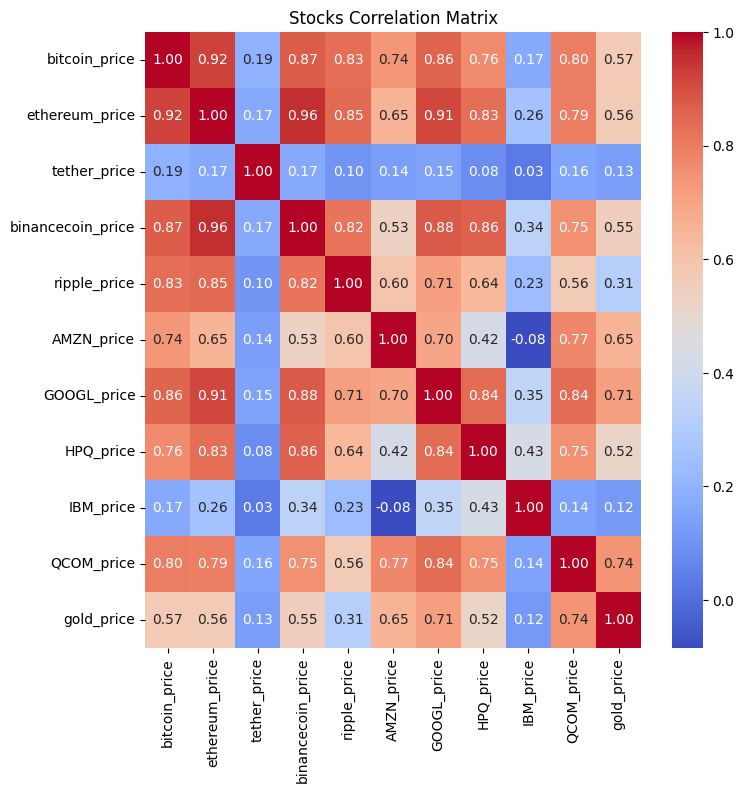

In [35]:
#Cross-Asset Price Correlation Matrix
plt.figure(figsize=(8, 8))

sns.heatmap(price_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Stocks Correlation Matrix')
plt.show()

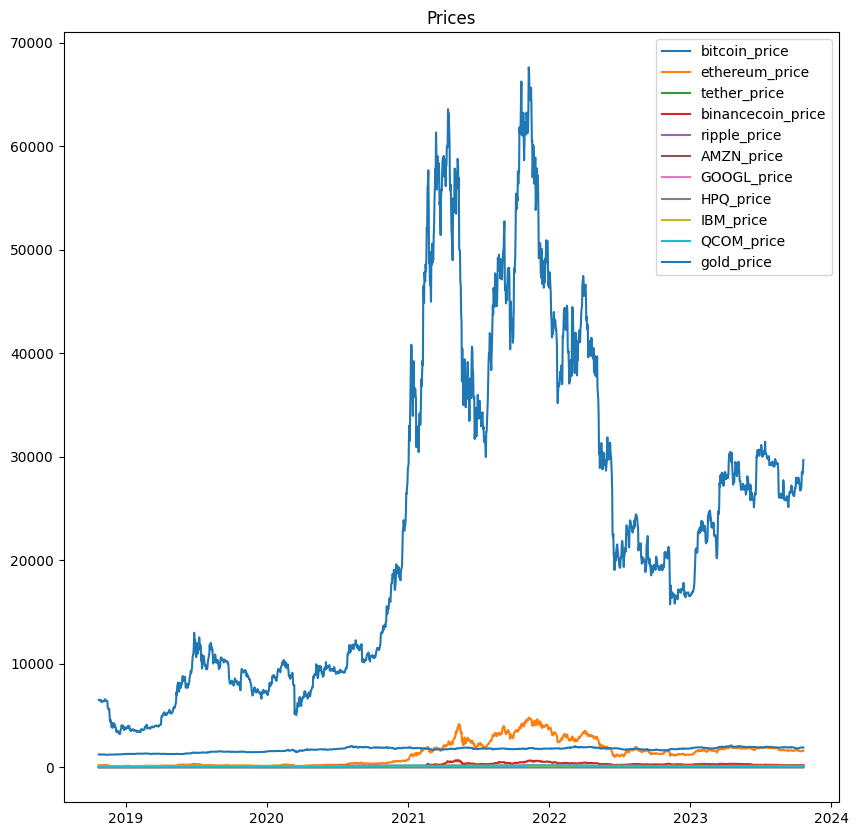

In [36]:
#Price Plot Crypto
plt.figure(figsize=(10, 10))

plt.plot(price_df)
plt.title('Prices')
plt.legend(price_columns)
plt.show()

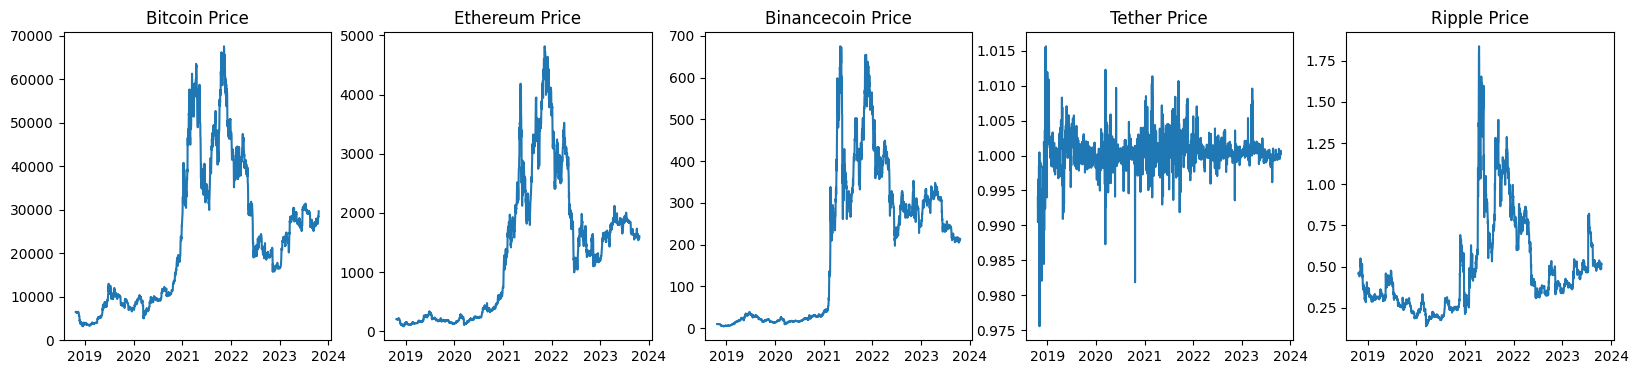

In [37]:
#Price Plot Crypto
plt.figure(figsize=(20, 4))

plt.subplot(1,5,1)
plt.plot(price_df['bitcoin_price'])
plt.title('Bitcoin Price')

plt.subplot(1,5,2)
plt.plot(price_df['ethereum_price'])
plt.title('Ethereum Price')

plt.subplot(1,5,3)
plt.plot(price_df['binancecoin_price'])
plt.title('Binancecoin Price')

plt.subplot(1,5,4)
plt.plot(price_df['tether_price'])
plt.title('Tether Price')

plt.subplot(1,5,5)
plt.plot(price_df['ripple_price'])
plt.title('Ripple Price')

plt.show()

Text(0.5, 1.0, 'Ripple volume')

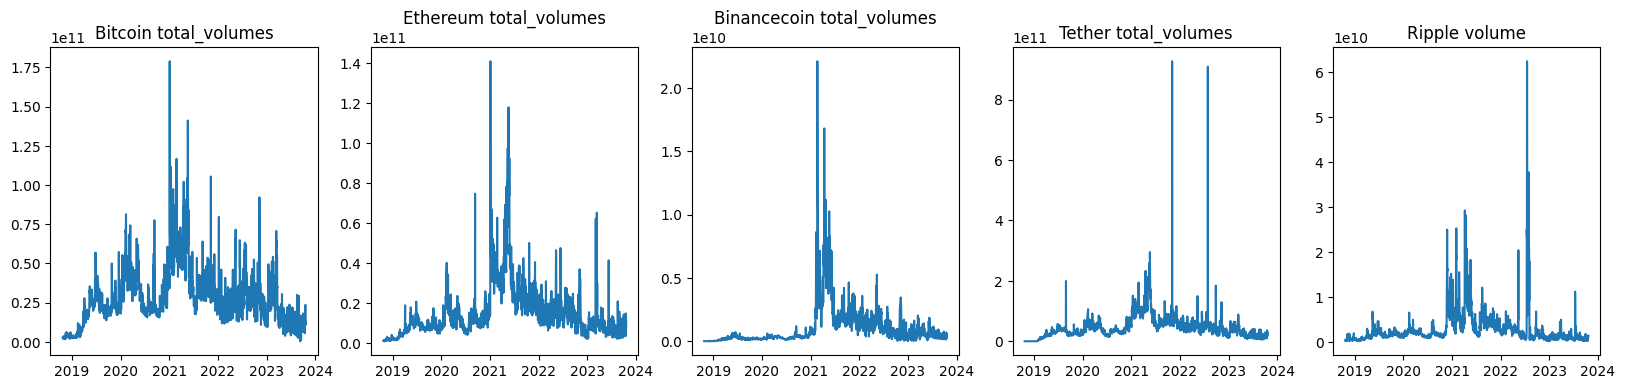

In [38]:
plt.figure(figsize=(20, 4))

plt.subplot(1,5,1)
plt.plot(crypto_df['bitcoin_total_volumes'])
plt.title('Bitcoin total_volumes')

plt.subplot(1,5,2)
plt.plot(crypto_df['ethereum_total_volumes'])
plt.title('Ethereum total_volumes')

plt.subplot(1,5,3)
plt.plot(crypto_df['binancecoin_total_volumes'])
plt.title('Binancecoin total_volumes')

plt.subplot(1,5,4)
plt.plot(crypto_df['tether_total_volumes'])
plt.title('Tether total_volumes')

plt.subplot(1,5,5)
plt.plot(crypto_df['ripple_total_volumes'])
plt.title('Ripple volume')

Text(0.5, 1.0, 'QCOM Price')

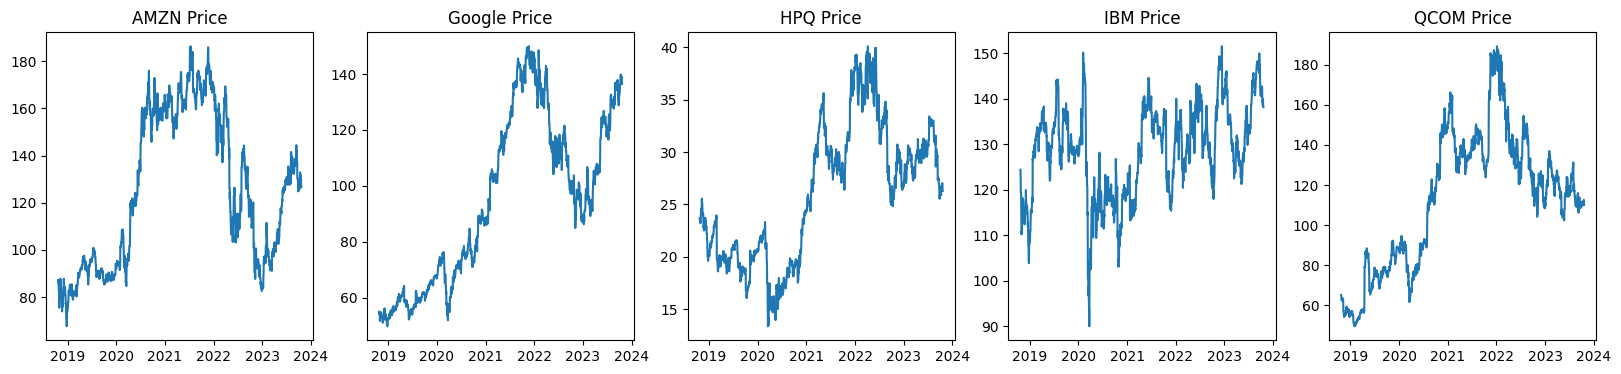

In [39]:
plt.figure(figsize=(20, 4))

plt.subplot(1,5,1)
plt.plot(final_df['AMZN_price'])
plt.title('AMZN Price')

plt.subplot(1,5,2)
plt.plot(final_df['GOOGL_price'])
plt.title('Google Price')

plt.subplot(1,5,3)
plt.plot(final_df['HPQ_price'])
plt.title('HPQ Price')

plt.subplot(1,5,4)
plt.plot(final_df['IBM_price'])
plt.title('IBM Price')

plt.subplot(1,5,5)
plt.plot(final_df['QCOM_price'])
plt.title('QCOM Price')

Text(0.5, 1.0, 'QCOM volume')

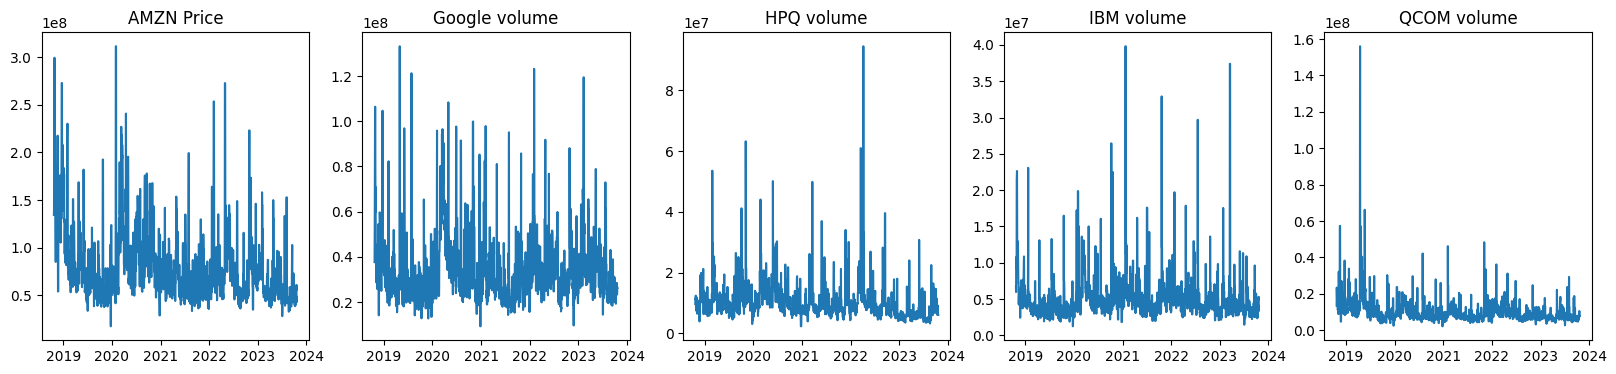

In [40]:
plt.figure(figsize=(20, 4))

plt.subplot(1,5,1)
plt.plot(final_df['AMZN_volume'])
plt.title('AMZN Price')

plt.subplot(1,5,2)
plt.plot(final_df['GOOGL_volume'])
plt.title('Google volume')

plt.subplot(1,5,3)
plt.plot(final_df['HPQ_volume'])
plt.title('HPQ volume')

plt.subplot(1,5,4)
plt.plot(final_df['IBM_volume'])
plt.title('IBM volume')

plt.subplot(1,5,5)
plt.plot(final_df['QCOM_volume'])
plt.title('QCOM volume')

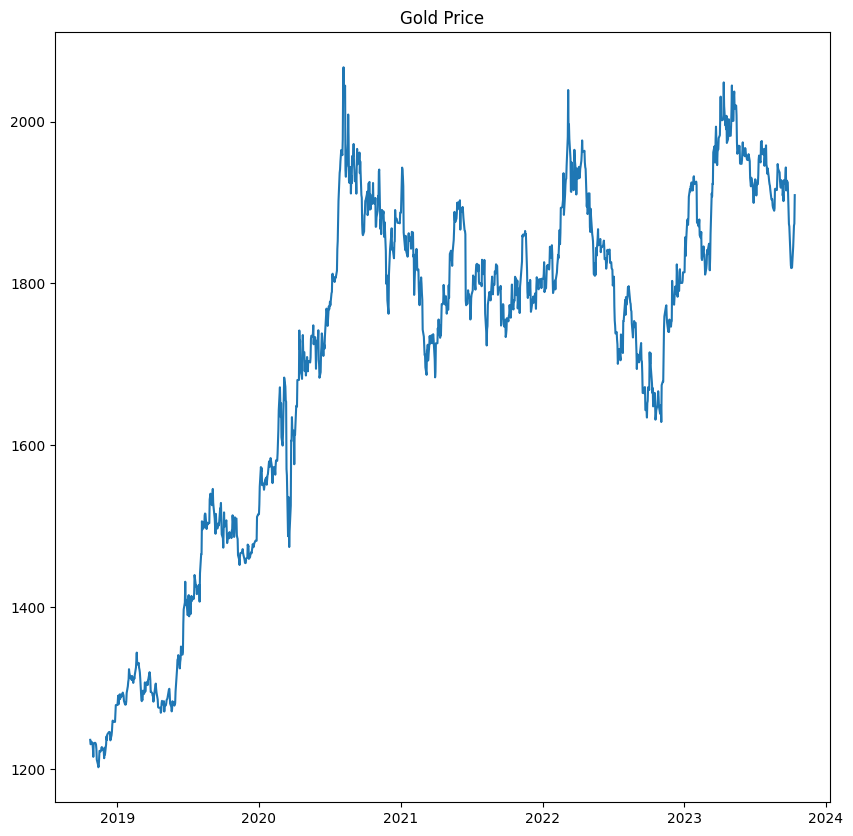

In [41]:
plt.figure(figsize=(10, 10))

plt.plot(gold_df)
plt.title('Gold Price')
plt.show()

## Exploring Research Questions

### Research Question 1:

In [42]:
returns_df = price_df.pct_change().dropna()
returns_df.describe()

bitcoin_price  ethereum_price  tether_price  binancecoin_price  \
count    1824.000000     1824.000000   1824.000000        1824.000000   
mean        0.001472        0.002211      0.000007           0.002947   
std         0.035551        0.046049      0.002834           0.050878   
min        -0.351903       -0.430547     -0.024904          -0.428239   
25%        -0.013302       -0.018259     -0.000926          -0.017443   
50%         0.000591        0.000804      0.000024           0.001053   
75%         0.016307        0.023525      0.000977           0.023111   
max         0.192470        0.245336      0.025320           0.737863   

       ripple_price   AMZN_price  GOOGL_price    HPQ_price    IBM_price  \
count   1824.000000  1824.000000  1824.000000  1824.000000  1824.000000   
mean       0.001578     0.000338     0.000593     0.000213     0.000130   
std        0.056370     0.016368     0.013747     0.017593     0.011974   
min       -0.422790    -0.118264    -0.071905    -0.164632    -0.112487   
25%       -0.019965    -0.004717    -0.003784    -0.004023    -0.002877   
50%       -0.000229     0.000000     0.000000     0.000000     0.000000   
75%        0.019139     0.005711     0.005086     0.006495     0.003958   
max        0.723697     0.120953     0.101041     0.141860     0.090281   

        QCOM_price   gold_price  
count  1824.000000  1824.000000  
mean      0.000449     0.000269  
std       0.018165     0.007757  
min      -0.105913    -0.051259  
25%      -0.005131    -0.001541  
50%       0.000000     0.000000  
75%       0.006557     0.002383  
max       0.239168     0.052707

In [43]:
return_risk_df = returns_df.describe().loc[['mean', 'std']]

updated_names = {"bitcoin_price": "bitcoin", "ethereum_price": "ethereum", "tether_price": "tether", "binancecoin_price": "binancecoin", "ripple_price": "ripple", "AMZN_price": "AMZN", "GOOGL_price": "GOOGL", "HPQ_price": "HPQ", "IBM_price": "IBM", "QCOM_price": "QCOM", "gold_price": "gold"}
return_risk_df = return_risk_df.rename(columns=updated_names).T
return_risk_df = return_risk_df.rename_axis("asset_name")
return_risk_df = return_risk_df.rename(columns={"mean": "average_daily_return", "std": "risk"})

return_risk_df #average_daily_return and risk are in %/100

average_daily_return      risk
asset_name                                 
bitcoin                  0.001472  0.035551
ethereum                 0.002211  0.046049
tether                   0.000007  0.002834
binancecoin              0.002947  0.050878
ripple                   0.001578  0.056370
AMZN                     0.000338  0.016368
GOOGL                    0.000593  0.013747
HPQ                      0.000213  0.017593
IBM                      0.000130  0.011974
QCOM                     0.000449  0.018165
gold                     0.000269  0.007757

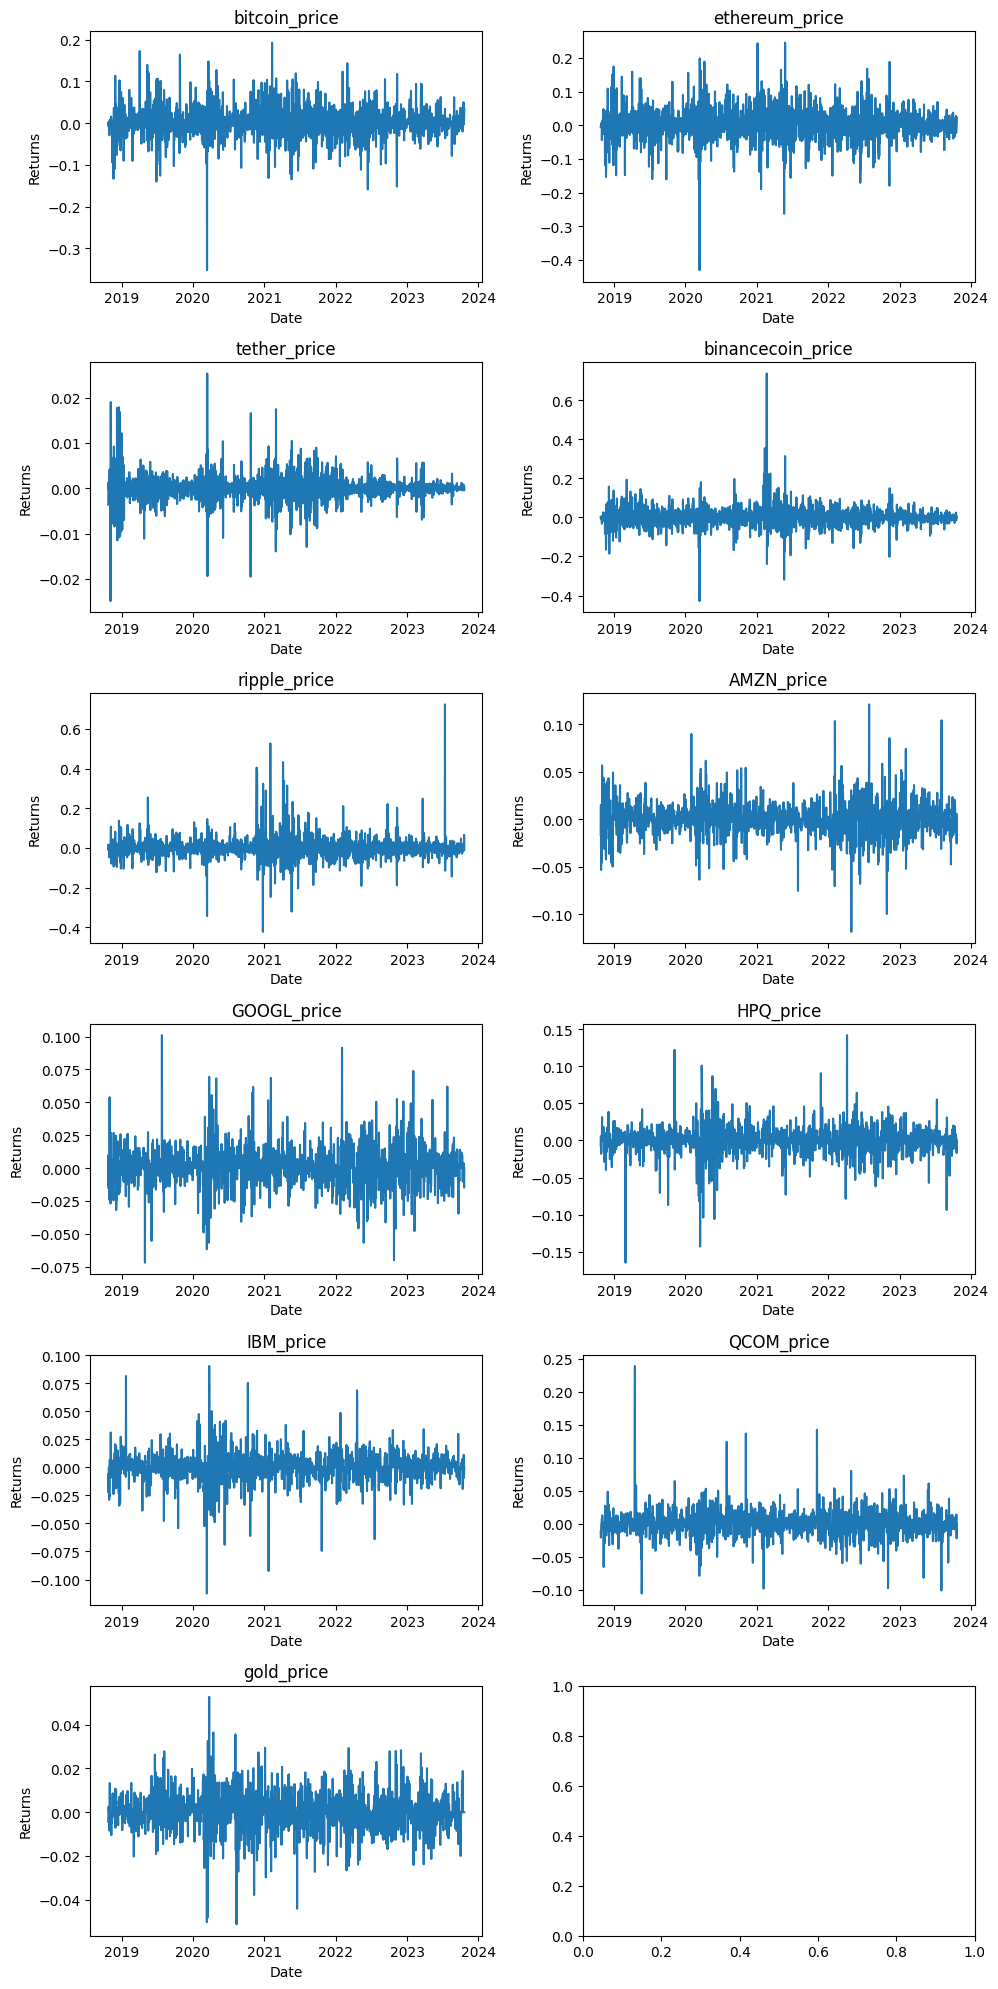

In [44]:
# Get the list of asset names
asset_names = returns_df.columns

# Create the subplots
fig, axes = plt.subplots(6, 2, figsize=(10, 20))
axes = axes.reshape(-1)

# Plot the returns of each asset on a subplot
for i, asset_name in enumerate(asset_names):
    ax = axes[i]
    ax.plot(returns_df[asset_name])
    ax.set_title(asset_name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Returns')

plt.tight_layout()
plt.show()


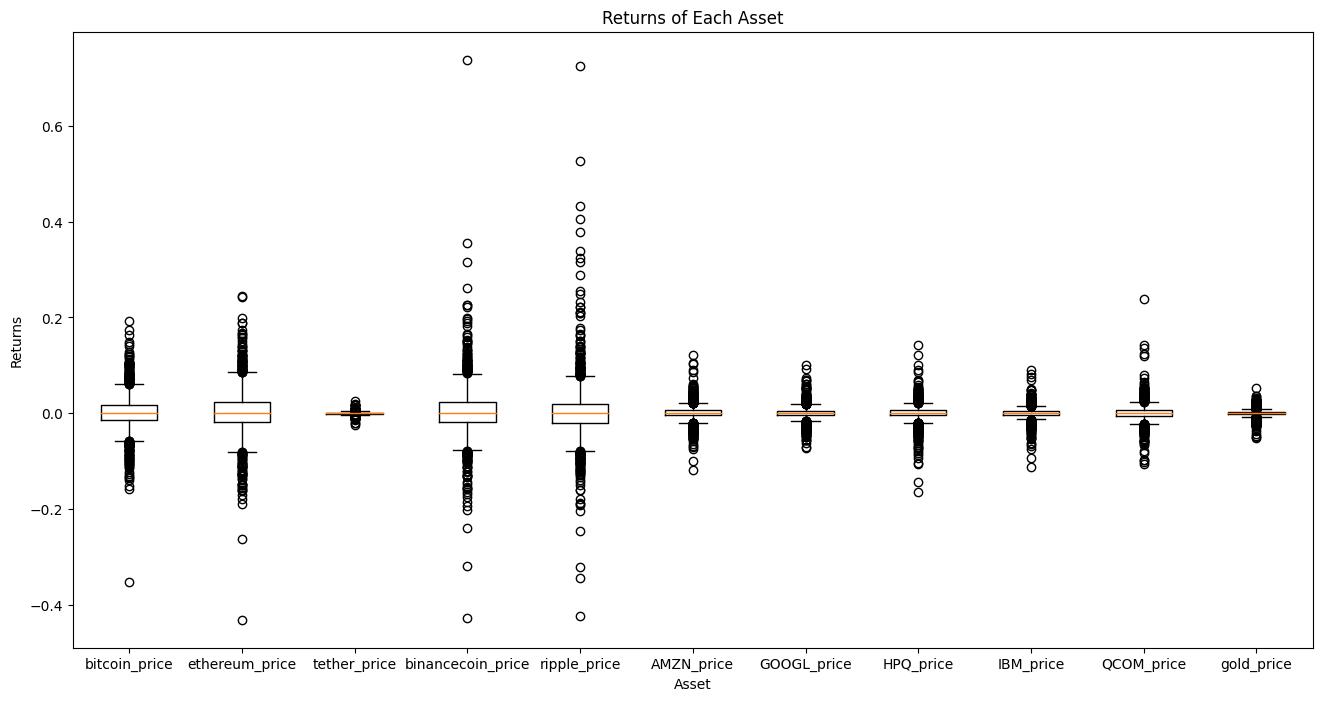

In [45]:
# box plot for returns of each asset
plt.figure(figsize=(16, 8))
plt.boxplot(returns_df.values, labels=returns_df.columns)
plt.title('Returns of Each Asset')
plt.xlabel('Asset')
plt.ylabel('Returns')
plt.show()


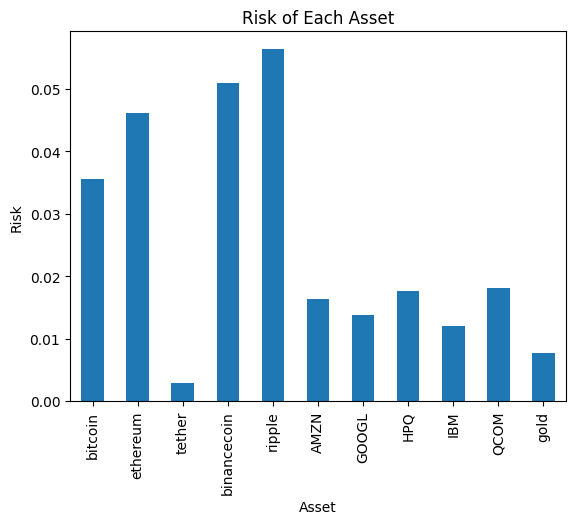

In [48]:
# Plot of risk of each asset

return_risk_df['risk'].plot(kind='bar')
plt.xlabel('Asset')
plt.ylabel('Risk')
plt.title('Risk of Each Asset')
plt.show()

### Portfolio Allocation

In [49]:
# %pip install PyPortfolioOpt
from pypfopt import risk_models, expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(price_df)
S = risk_models.sample_cov(price_df)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1)) #use weight_bounds=(-1, 1) to allow both long and short position, use weight_bounds=(0, 1) to allow only long position
weights = ef.max_sharpe() 
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# Get the performance metrics of the optimized portfolio
ef.portfolio_performance(verbose=True)

OrderedDict([('bitcoin_price', 0.00846), ('ethereum_price', 0.10243), ('tether_price', -0.58696), ('binancecoin_price', 0.27548), ('ripple_price', -0.18531), ('AMZN_price', -0.2888), ('GOOGL_price', 1.0), ('HPQ_price', -0.20411), ('IBM_price', -0.21221), ('QCOM_price', 0.091), ('gold_price', 1.0)])
Expected annual return: 35.9%
Annual volatility: 31.9%
Sharpe Ratio: 1.06


(0.35911697810667187, 0.318850907134882, 1.0635597093133462)

In [50]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(price_df)

portfolio_allocation = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = portfolio_allocation.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'GOOGL_price': 29, 'gold_price': 2, 'binancecoin_price': 5, 'QCOM_price': 4, 'tether_price': -5868, 'AMZN_price': -23, 'IBM_price': -15, 'HPQ_price': -78, 'ripple_price': -3585}
Funds remaining: $740.47


###  Research Question 2:

#### Load & Prepare New (Test) Data

In [51]:
new_crypto_df = pd.read_csv("new_crypto_data.csv")
new_stocks_df = pd.read_csv("new_stocks_data.csv")
new_gold_df = pd.read_csv("new_gold_data.csv")

In [52]:
new_crypto_df['timestamp'] = pd.to_datetime(new_crypto_df['timestamp'])
new_crypto_df.set_index('timestamp', inplace=True)

new_crypto_df

bitcoin_price  ethereum_price  tether_price  binancecoin_price  \
timestamp                                                                    
2023-10-22   29944.684537     1637.455126      1.000469         214.997366   
2023-10-23   30019.380501     1664.570638      1.000827         217.948904   
2023-10-24   32953.262761     1764.930309      1.001324         228.242746   
2023-10-25   33846.724257     1784.773411      1.000154         225.093166   
2023-10-26   34498.184149     1787.292782      1.000595         222.137146   
2023-10-27   34174.451553     1804.161769      0.999833         223.092839   
2023-10-28   33899.093056     1780.570412      0.999605         224.318365   
2023-10-29   34092.630933     1776.353566      1.000049         225.705788   
2023-10-30   34524.947148     1796.735992      1.000589         227.057014   
2023-10-31   34494.379869     1809.528991      1.000347         228.139394   
2023-11-01   34672.289284     1816.803149      1.000745         226.565416   
2023-11-02   35457.454912     1846.482231      1.000448         227.878762   
2023-11-03   34924.055450     1800.907180      0.999912         231.828266   
2023-11-04   34731.381369     1834.173057      1.000419         230.755983   
2023-11-05   35077.874707     1857.067634      1.000348         237.362242   
2023-11-06   35061.928749     1895.938066      1.000509         244.326915   
2023-11-07   35031.268882     1898.518226      1.000670         253.405494   
2023-11-08   35439.849378     1887.878474      1.000398         246.305498   
2023-11-09   35647.751031     1887.797756      0.998575         246.817947   
2023-11-10   36768.420819     2128.609504      1.000460         251.364833   
2023-11-11   37344.249001     2078.853466      1.000343         250.933285   
2023-11-12   37122.722824     2052.994586      1.001076         251.592656   
2023-11-13   37067.696982     2045.427373      1.000697         247.668209   
2023-11-14   36549.162048     2060.532856      0.999571         241.236937   
2023-11-15   35545.201433     1980.515431      1.000063         242.142184   
2023-11-16   37903.662452     2060.884167      1.000761         253.883437   
2023-11-17   36163.466890     1959.256968      0.998843         242.527837   
2023-11-18   36618.603213     1962.658150      1.002047         244.993564   
2023-11-19   36588.255833     1962.630566      1.000767         244.828397   
2023-11-20   37413.994608     2011.126721      0.999726         246.233603   
2023-11-21   37489.298471     2022.388148      1.000446         253.372980   
2023-11-22   35965.360361     1944.208978      1.000763         227.950841   
2023-11-23   37464.832932     2065.941441      0.999960         236.096616   
2023-11-24   37293.316127     2062.269552      0.999878         233.749473   
2023-11-25   37738.931697     2080.851758      1.001039         232.861337   
2023-11-26   37800.282173     2084.575062      1.000408         234.416603   
2023-11-27   37479.463901     2064.074218      1.000189         232.071045   
2023-11-28   37275.702983     2027.218232      0.999701         227.475445   
2023-11-29   37802.236044     2048.535257      1.000498         229.527526   
2023-11-30   37810.346417     2025.937328      1.000012         227.079136   
2023-12-01   37711.818376     2051.756718      0.999617         227.602555   
2023-12-02   38688.258742     2085.712361      1.000559         228.450998   
2023-12-03   39481.666416     2165.297881      1.000690         229.258652   

            ripple_price  
timestamp                 
2023-10-22      0.518070  
2023-10-23      0.522895  
2023-10-24      0.545775  
2023-10-25      0.558248  
2023-10-26      0.555079  
2023-10-27      0.553837  
2023-10-28      0.545946  
2023-10-29      0.545115  
2023-10-30      0.555981  
2023-10-31      0.579071  
2023-11-01      0.600446  
2023-11-02      0.609384  
2023-11-03      0.606563  
2023-11-04      0.612858  
2023-11-05      0.616099  
2023-11-06      0.659180  
2023-11-07     

In [53]:
new_gold_df.rename({'date': 'timestamp', 'price': 'gold_price'},axis=1, inplace=True)
new_gold_df['timestamp'] = pd.to_datetime(new_gold_df['timestamp'])
new_gold_df.set_index(new_gold_df['timestamp'].dt.date, inplace=True)

# Drop the original 'timestamp' column
new_gold_df.drop(columns=['timestamp'], inplace=True)

new_gold_df

gold_price
timestamp             
2023-10-22     1984.20
2023-10-23     1980.95
2023-10-24     1967.40
2023-10-25     1970.15
2023-10-26     1991.45
2023-10-27     1987.60
2023-10-28     1987.60
2023-10-29     1987.60
2023-10-30     1996.15
2023-10-31     1997.60
2023-11-01     1997.60
2023-11-02     1986.70
2023-11-03     1988.50
2023-11-04     1988.50
2023-11-05     1988.50
2023-11-06     1987.10
2023-11-07     1967.80
2023-11-08     1960.10
2023-11-09     1946.75
2023-11-10     1953.45
2023-11-11     1953.45
2023-11-12     1953.45
2023-11-13     1937.45
2023-11-14     1946.55
2023-11-15     1973.40
2023-11-16     1966.50
2023-11-17     1992.15
2023-11-18     1992.15
2023-11-19     1992.15
2023-11-20     1976.05
2023-11-21     1988.55
2023-11-22     1999.90
2023-11-23     1992.60
2023-11-24     1995.20
2023-11-25     1995.20
2023-11-26     1995.20
2023-11-27     2011.70
2023-11-28     2014.00
2023-11-29     2037.60
2023-11-30     2037.85
2023-12-01     2044.55
2023-12-02     2044.55

In [54]:
new_stocks_df['timestamp'] = pd.to_datetime(new_stocks_df['timestamp'])
new_stocks_df.set_index(new_stocks_df['timestamp'], inplace=True)
new_stocks_df.drop(columns=['timestamp'], inplace=True)
new_stocks_df

AMZN_price  GOOGL_price  HPQ_price   IBM_price  QCOM_price  \
timestamp                                                                
2023-10-23  125.930000   135.805000  25.950000  136.774994  109.125000   
2023-10-24  127.570000   138.389999  26.090000  137.014999  109.385002   
2023-10-25  123.564999   126.689999  26.080000  137.410004  106.860001   
2023-10-26  119.994999   122.799999  26.110001  142.995003  105.400002   
2023-10-27  127.770000   121.759998  25.980000  143.205002  106.864998   
2023-10-30  130.779999   124.075001  26.115000  143.540001  107.755001   
2023-10-31  132.640007   124.030003  26.179999  143.674995  107.950001   
2023-11-01  135.530006   125.105000  26.405000  145.479996  109.945000   
2023-11-02  137.639999   127.954998  26.835000  145.970001  116.764999   
2023-11-03  138.470001   128.695000  27.250000  147.864998  118.730000   
2023-11-06  139.544998   129.504997  27.410000  148.540001  119.469997   
2023-11-07  141.934998   130.895004  27.455000  148.654999  120.125000   
2023-11-08  142.169998   131.495003  27.285000  148.634995  120.605000   
2023-11-09  141.244995   131.310005  27.195000  146.135002  121.139999   
2023-11-10  141.779999   131.105003  27.325001  148.010002  122.889999   
2023-11-13  141.949997   131.919998  27.805000  147.920006  123.590000   
2023-11-14  145.969994   134.510002  28.340000  149.930000  127.150002   
2023-11-15  144.939995   134.300003  28.560000  151.809998  128.644997   
2023-11-16  141.420006   135.770004  28.260000  152.740005  129.339996   
2023-11-17  143.884995   134.854996  28.245000  152.980003  129.104996   
2023-11-20  145.680000   135.139999  28.055000  153.514999  129.570000   
2023-11-21  142.775002   136.570000  27.885000  154.084999  126.610001   
2023-11-22  146.155006   138.445000  28.590000  154.935005  128.334999   
2023-11-24  146.260002   137.060005  28.635000  154.659996  127.894997   
2023-11-27  148.070000   137.209999  28.465000  155.445000  127.905003   
2023-11-28  146.565002   136.334999  28.500000  155.305000  126.489998   
2023-11-29  147.254997   136.564995  29.085000  156.764999  129.110004   
2023-11-30  145.629997   133.415001  29.200000  157.745003  128.444996   
2023-12-01  146.400002   131.389999  29.065000  159.294998  129.389999   

            AMZN_volume  GOOGL_volume  HPQ_volume  IBM_volume  QCOM_volume  
timestamp                                                                   
2023-10-23     48260000      26317900     4582700     3457500      6679200  
2023-10-24     46477400      44814300     6426700     3698000      8578600  
2023-10-25     74577500      84366200     4249700     6472500      8571600  
2023-10-26    100419500      57061100     9205800    11130200      8705200  
2023-10-27    125309300      44566500     5463900     5469200      7292000  
2023-10-30     72485500      28940100     5454700     4204100      6634000  
2023-10-31     51589400      26292300     8402700     6591800      6485500  
2023-11-01     61529400      30082400     5966500     4750100     12809900  
2023-11-02     52236700      27124600     5276000     3902700     22106100  
2023-11-03     44007200      26380100     4653800     3510100     10667600  
2023-11-06     44970400      19052700     5944300     4597200      7756400  
2023-11-07     53553500      29757300     6699300     3549900      7898400  
2023-11-08     44521700      26425800     5493400     3618600      7681900  
2023-11-09     36235400      23747800     6569400     3412700      9002700  
2023-11-10     49287800      26913300    10387200     3179000     12191600  
2023-11-13     35680600      18324800     8606000     2647200      7959200  
2023-11-14     56674600      32395200     7056100     4321900     11255400  
2023-11-15     63875700      23861500     8460900     4632500      7789100  
2023-11-16     49653500      28013200     8823200     3519200     11655700  
2023-11-17     49636700      37240600     7957400     4426500      6543300  
2023-11-20     41951200

In [ ]:
# Function to calculate percentage mean absolute error
def calculate_pmae(actual, predicted):
    mae = np.mean(abs(actual - predicted))
    pmae = (mae / np.mean(actual)) * 100
    return pmae

#### Model: Random Forest Regression

##### With All Data (Price, Market Cap, Volume)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Extract features and target variable
def run_rfr(col):
    X = final_df.drop(col, axis=1)
    y = final_df[col]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Regression model
    random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)

    # Feature importances
    feature_importances = random_forest_model.feature_importances_

    # Create a dataframe to display feature importances
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Display the feature importances
    print(col.capitalize())
    print(feature_importance_df)

    # Select relevant features based on a threshold
    threshold = 0.05  # Adjust as needed
    relevant_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

    # Train Random Forest Regression model with relevant features
    X_train_relevant = X_train[relevant_features]
    X_test_relevant = X_test[relevant_features]

    random_forest_model_relevant = RandomForestRegressor(n_estimators=100, random_state=42)
    random_forest_model_relevant.fit(X_train_relevant, y_train)

    # Make predictions
    y_pred = random_forest_model_relevant.predict(X_test_relevant)

    # Evaluate the model
    pmae = calculate_pmae(y_test, y_pred)
    print(f'Percentage Absolute Mean Error: {pmae}\n')

In [64]:
all_columns = price_df.columns

for column in all_columns:
    run_rfr(column)

Bitcoin_price
                     Feature  Importance
9         bitcoin_market_cap    0.928678
10       ethereum_market_cap    0.029857
11         tether_market_cap    0.020943
0             ethereum_price    0.014670
15               GOOGL_price    0.005641
14                AMZN_price    0.000025
17                 IBM_price    0.000023
18                QCOM_price    0.000021
1               tether_price    0.000012
24                gold_price    0.000011
13         ripple_market_cap    0.000010
16                 HPQ_price    0.000010
3               ripple_price    0.000009
5      ethereum_total_volume    0.000009
22                IBM_volume    0.000009
20              GOOGL_volume    0.000009
12    binancecoin_market_cap    0.000008
8        ripple_total_volume    0.000008
4       bitcoin_total_volume    0.000008
23               QCOM_volume    0.000007
21                HPQ_volume    0.000007
7   binancecoin_total_volume    0.000007
19               AMZN_volume    0.000006
2 

##### With Only Price

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Extract features and target variable
def run_rfr_price(col):
    X = price_df.drop(col, axis=1)
    y = price_df[col]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Regression model
    random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)

    # Feature importances
    feature_importances = random_forest_model.feature_importances_

    # Create a dataframe to display feature importances
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Display the feature importances
    print(col.capitalize())
    print(feature_importance_df)

    # Select relevant features based on a threshold
    threshold = 0.05  # Adjust as needed
    relevant_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

    # Train Random Forest Regression model with relevant features
    X_train_relevant = X_train[relevant_features]
    X_test_relevant = X_test[relevant_features]

    random_forest_model_relevant = RandomForestRegressor(n_estimators=100, random_state=42)
    random_forest_model_relevant.fit(X_train_relevant, y_train)

    # Make predictions
    y_pred = random_forest_model_relevant.predict(X_test_relevant)

    # Evaluate the model
    pmae = calculate_pmae(y_test, y_pred)
    print(f'Percentage Absolute Mean Error: {pmae}\n')

In [81]:
all_columns = price_df.columns

for column in all_columns:
    run_rfr_price(column)

Bitcoin_price
             Feature  Importance
0     ethereum_price    0.707975
4         AMZN_price    0.166795
5        GOOGL_price    0.046410
2  binancecoin_price    0.027714
9         gold_price    0.013274
8         QCOM_price    0.012550
3       ripple_price    0.012509
7          IBM_price    0.006928
6          HPQ_price    0.003862
1       tether_price    0.001984
Percentage Absolute Mean Error: 5.0259581289151685

Ethereum_price
             Feature  Importance
2  binancecoin_price    0.896132
0      bitcoin_price    0.042427
5        GOOGL_price    0.038263
7          IBM_price    0.007562
3       ripple_price    0.006023
8         QCOM_price    0.004946
4         AMZN_price    0.001679
9         gold_price    0.001468
6          HPQ_price    0.001075
1       tether_price    0.000426
Percentage Absolute Mean Error: 15.348292961301787

Tether_price
             Feature  Importance
9         gold_price    0.273296
2  binancecoin_price    0.105240
3       ripple_price    0.101

#### Model: OLS

##### With All Data (Price, Market Cap, Volume)

In [77]:
import statsmodels.api as sm

def run_ols(col):
    X = final_df.drop(col, axis=1)
    y = final_df[col]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Model
    model = sm.OLS(y_train, X_train).fit()
    print(model.summary())
    
    # Predict on X_test
    predicted_y = np.array(model.predict(X_test))
    pmae = calculate_pmae(y_test, predicted_y)
    return pmae

In [78]:
all_columns = price_df.columns
pmae_values = []

for column in all_columns:
    pmae_values.append(run_ols(column))

                            OLS Regression Results                            
Dep. Variable:          bitcoin_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.409e+06
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:09:43   Log-Likelihood:                -8504.8
No. Observations:                1460   AIC:                         1.706e+04
Df Residuals:                    1435   BIC:                         1.719e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
ethereum_price          

In [79]:
for i, pmae in enumerate(pmae_values):
    print(f"PMAE of {all_columns[i]}: {pmae}")

PMAE of bitcoin_price: 0.26656936034802575
PMAE of ethereum_price: 0.4319616933385289
PMAE of tether_price: 2.802285107076671
PMAE of binancecoin_price: 1.9854271242382875
PMAE of ripple_price: 1.0552456828732786
PMAE of AMZN_price: 6.706714784506393
PMAE of GOOGL_price: 4.446727586759473
PMAE of HPQ_price: 5.507286664007852
PMAE of IBM_price: 3.702048169763593
PMAE of QCOM_price: 7.181741917009734
PMAE of gold_price: 3.5997300079237062


##### With Only Price

In [86]:
def run_ols_price(col):
    X = price_df.drop(col, axis=1)
    y = price_df[col]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Model
    model = sm.OLS(y_train, X_train).fit()
    print(model.summary())
    
    # Predict on X_test
    predicted_y = np.array(model.predict(X_test))
    pmae = calculate_pmae(y_test, predicted_y)
    return pmae

In [87]:
all_columns = price_df.columns
pmae_values = []

for column in all_columns:
    pmae_values.append(run_ols_price(column))

                                 OLS Regression Results                                
Dep. Variable:          bitcoin_price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              3925.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):                        0.00
Time:                        22:28:35   Log-Likelihood:                         -14625.
No. Observations:                1460   AIC:                                  2.927e+04
Df Residuals:                    1450   BIC:                                  2.932e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [88]:
for i, pmae in enumerate(pmae_values):
    print(f"PMAE of {all_columns[i]}: {pmae}")

PMAE of bitcoin_price: 13.779098515969126
PMAE of ethereum_price: 11.080691029833508
PMAE of tether_price: 3.982520250115334
PMAE of binancecoin_price: 16.773285599477553
PMAE of ripple_price: 15.626914132753262
PMAE of AMZN_price: 8.419518809094662
PMAE of GOOGL_price: 6.748782742896007
PMAE of HPQ_price: 8.01044466470234
PMAE of IBM_price: 4.558495686662677
PMAE of QCOM_price: 8.915954616311751
PMAE of gold_price: 5.254079381748951


#### Model: LSTM

In [57]:
# Function that prepares sequence for running the model
def prepare_sequences(data, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [58]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

def train_and_evaluate_lstm_model(data,test, col, sequence_length=10, epochs=50, batch_size=32):
    # Step 1: Split Crypto data into training and validation sets
    crypto_train, crypto_val = train_test_split(data[col], test_size=0.2, shuffle=False)

    # Step 2: Normalize data and prepare sequences for LSTM
    scaler = MinMaxScaler()
    crypto_train_scaled = scaler.fit_transform(crypto_train.values.reshape(-1, 1))
    crypto_val_scaled = scaler.transform(crypto_val.values.reshape(-1, 1))

    X_train, y_train = prepare_sequences(crypto_train_scaled, sequence_length)
    X_val, y_val = prepare_sequences(crypto_val_scaled, sequence_length)

    # Step 3: Build and train an LSTM model on the whole dataset
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    # Step 4: Make predictions on the validation set
    y_val_pred = model.predict(X_val)

    # Step 5: Invert the scaling to get actual prices
    y_val = scaler.inverse_transform(y_val)
    y_val_pred = scaler.inverse_transform(y_val_pred)

    pmse = calculate_pmae(y_val, y_val_pred)
    print(f'Percentage Mean Absolute Error (PMAE) on validation set for {col}: {pmse:.2f}%')

    # Step 6: Plot the actual vs predicted curve
    plot_actual_vs_predicted(crypto_val, y_val, y_val_pred, sequence_length, col, "Validation")

    # Step 7: Retrain the model on the entire dataset
    full_data_scaled = scaler.transform(data[col].values.reshape(-1, 1))
    X_full, y_full = prepare_sequences(full_data_scaled, sequence_length)

    new_scaled = scaler.transform(test[col].values.reshape(-1, 1))
    X_test, y_test = prepare_sequences(new_scaled, sequence_length)

    model = Sequential()
    model.add(LSTM(50, input_shape=(X_full.shape[1], X_full.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_full, y_full, epochs=epochs, batch_size=batch_size)

    y_test_pred = model.predict(X_test)

    # Step 5: Invert the scaling to get actual prices
    y_test = scaler.inverse_transform(y_test)
    y_test_pred = scaler.inverse_transform(y_test_pred)

    pmse = calculate_pmae(y_test, y_test_pred)
    print(f'Percentage Mean Absolute Error (PMAE) on test set for {col}: {pmse:.2f}%')

    # Step 8: Plot the actual vs predicted curve for the test set
    plot_actual_vs_predicted(test, y_test, y_test_pred, sequence_length, col, "Test")

def plot_actual_vs_predicted(data, y_actual, y_pred, sequence_length, col, data_set):
    plt.figure(figsize=(16, 8))
    plt.plot(data.index[sequence_length:], y_actual, label='Actual Prices', color='blue')
    plt.plot(data.index[sequence_length:], y_pred, label='Predicted Prices', color='red')
    plt.title(f'Actual vs Predicted Prices on {data_set} Set for {col}')
    plt.xlabel('Time')
    plt.ylabel('Prices')
    plt.legend()

    # Increase space between x-axis labels
    plt.xticks(rotation=45, ha='right')  # Adjust rotation and ha as needed
    plt.tight_layout()  # Ensures labels do not overlap
    plt.show()



##### LSTM On Crypto Prices

Epoch 1/50
46/46 [==============================] - 2s 6ms/step - loss: 0.0218
Epoch 2/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 3/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 4/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 5/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 6/50
46/46 [==============================] - 0s 6ms/step - loss: 9.9709e-04
Epoch 7/50
46/46 [==============================] - 0s 6ms/step - loss: 9.4399e-04
Epoch 8/50
46/46 [==============================] - 0s 7ms/step - loss: 9.0947e-04
Epoch 9/50
46/46 [==============================] - 0s 6ms/step - loss: 9.3262e-04
Epoch 10/50
46/46 [==============================] - 0s 6ms/step - loss: 8.5895e-04
Epoch 11/50
46/46 [==============================] - 0s 6ms/step - loss: 8.5029e-04
Epoch 12/50
46/46 [==============================] - 0s 6ms/step - loss: 8.2206e-04
Epoch 13/50
46/46 [==

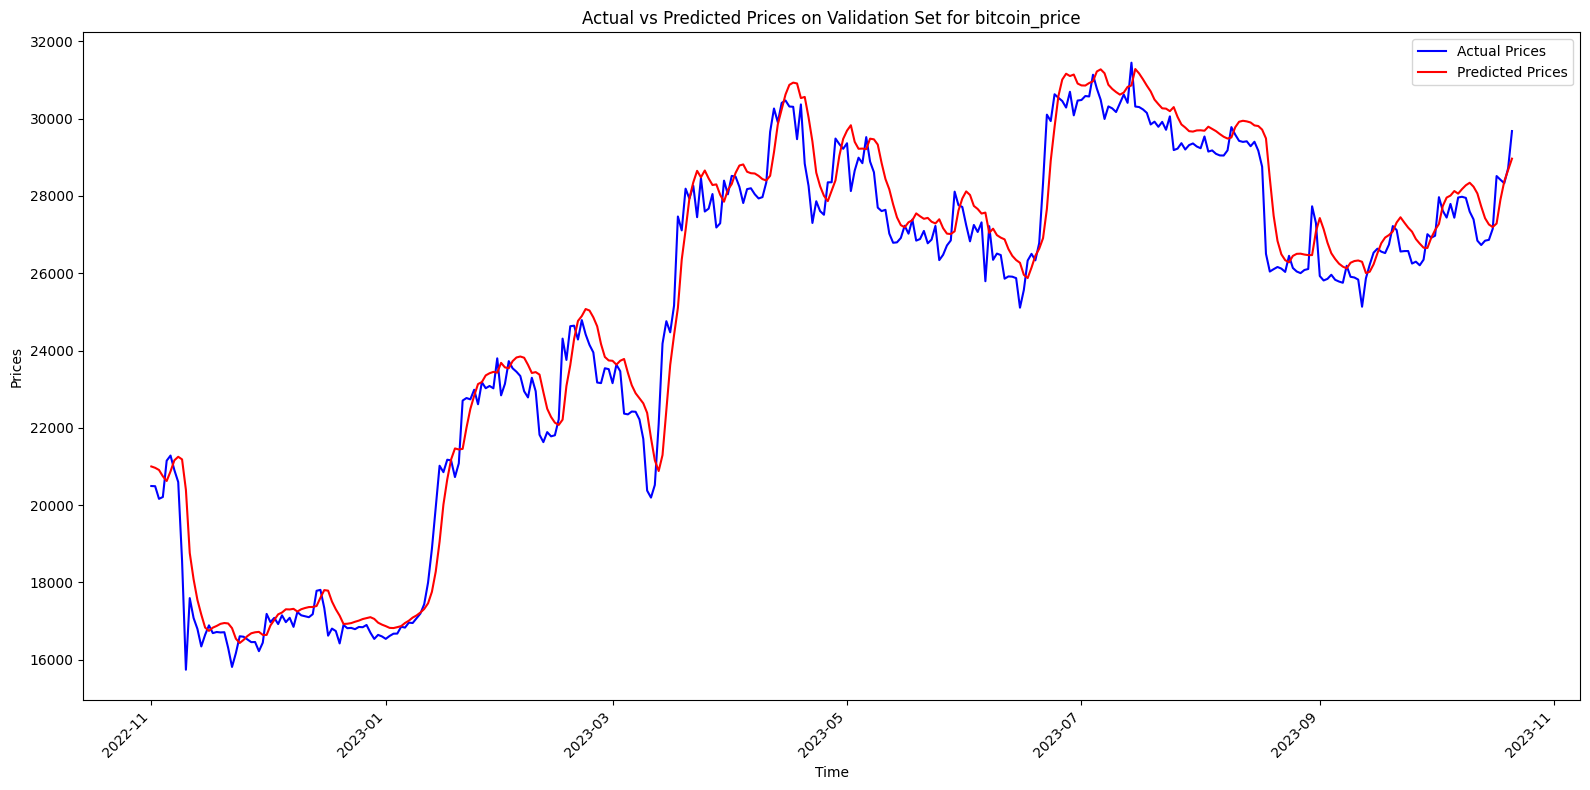

Epoch 1/50
57/57 [==============================] - 2s 5ms/step - loss: 0.0118
Epoch 2/50
57/57 [==============================] - 0s 5ms/step - loss: 9.2423e-04
Epoch 3/50
57/57 [==============================] - 0s 5ms/step - loss: 8.9115e-04
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 8.6570e-04
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 8.9676e-04
Epoch 6/50
57/57 [==============================] - 0s 5ms/step - loss: 8.4894e-04
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 8.0292e-04
Epoch 8/50
57/57 [==============================] - 0s 6ms/step - loss: 7.7510e-04
Epoch 9/50
57/57 [==============================] - 0s 6ms/step - loss: 7.4461e-04
Epoch 10/50
57/57 [==============================] - 0s 5ms/step - loss: 7.1077e-04
Epoch 11/50
57/57 [==============================] - 0s 6ms/step - loss: 7.2916e-04
Epoch 12/50
57/57 [==============================] - 0s 6ms/step - loss: 6.6046e-04
Epoch

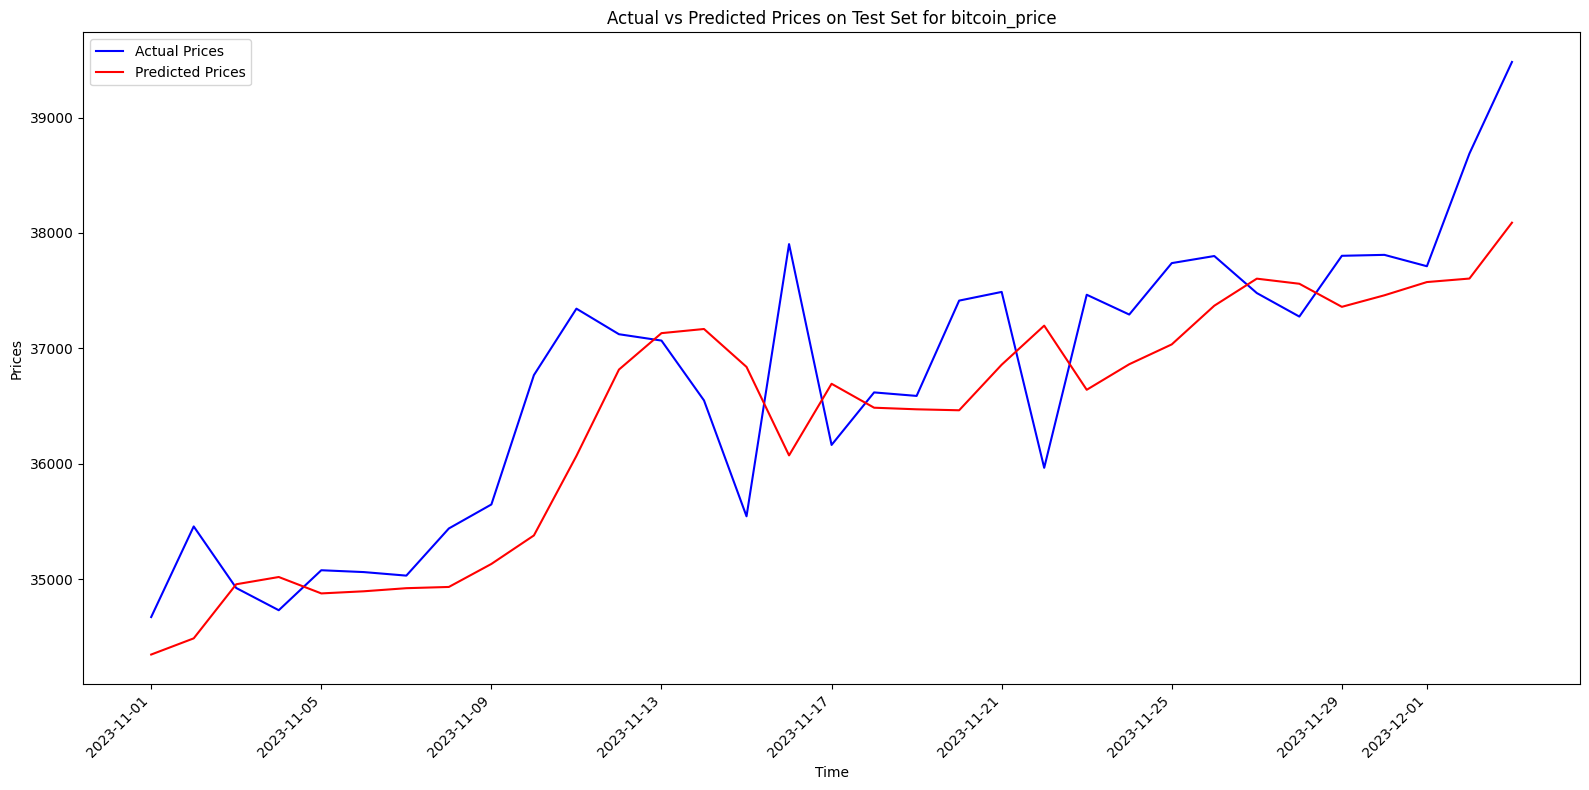

Epoch 1/50
46/46 [==============================] - 2s 6ms/step - loss: 0.0339
Epoch 2/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 3/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 4/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 5/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 6/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 7/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 8/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 9/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 10/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 11/50
46/46 [==============================] - 0s 6ms/step - loss: 9.7688e-04
Epoch 12/50
46/46 [==============================] - 0s 6ms/step - loss: 9.6741e-04
Epoch 13/50
46/46 [======================

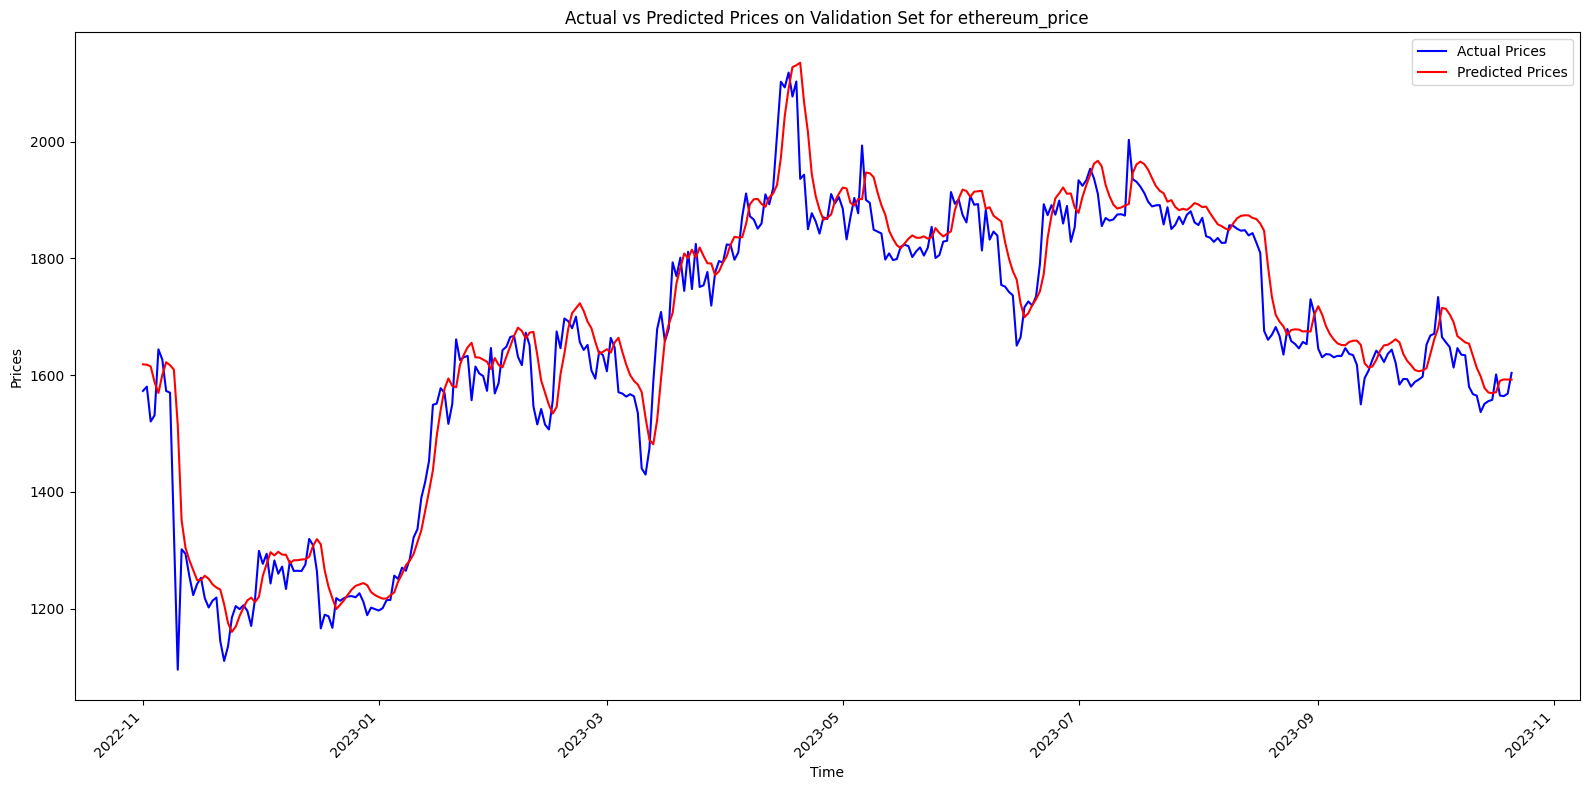

Epoch 1/50
57/57 [==============================] - 2s 6ms/step - loss: 0.0262
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 8/50
57/57 [==============================] - 0s 5ms/step - loss: 9.7688e-04
Epoch 9/50
57/57 [==============================] - 0s 5ms/step - loss: 9.8954e-04
Epoch 10/50
57/57 [==============================] - 0s 6ms/step - loss: 9.2824e-04
Epoch 11/50
57/57 [==============================] - 0s 6ms/step - loss: 9.0627e-04
Epoch 12/50
57/57 [==============================] - 0s 6ms/step - loss: 9.0455e-04
Epoch 13/50
57/57 [==========

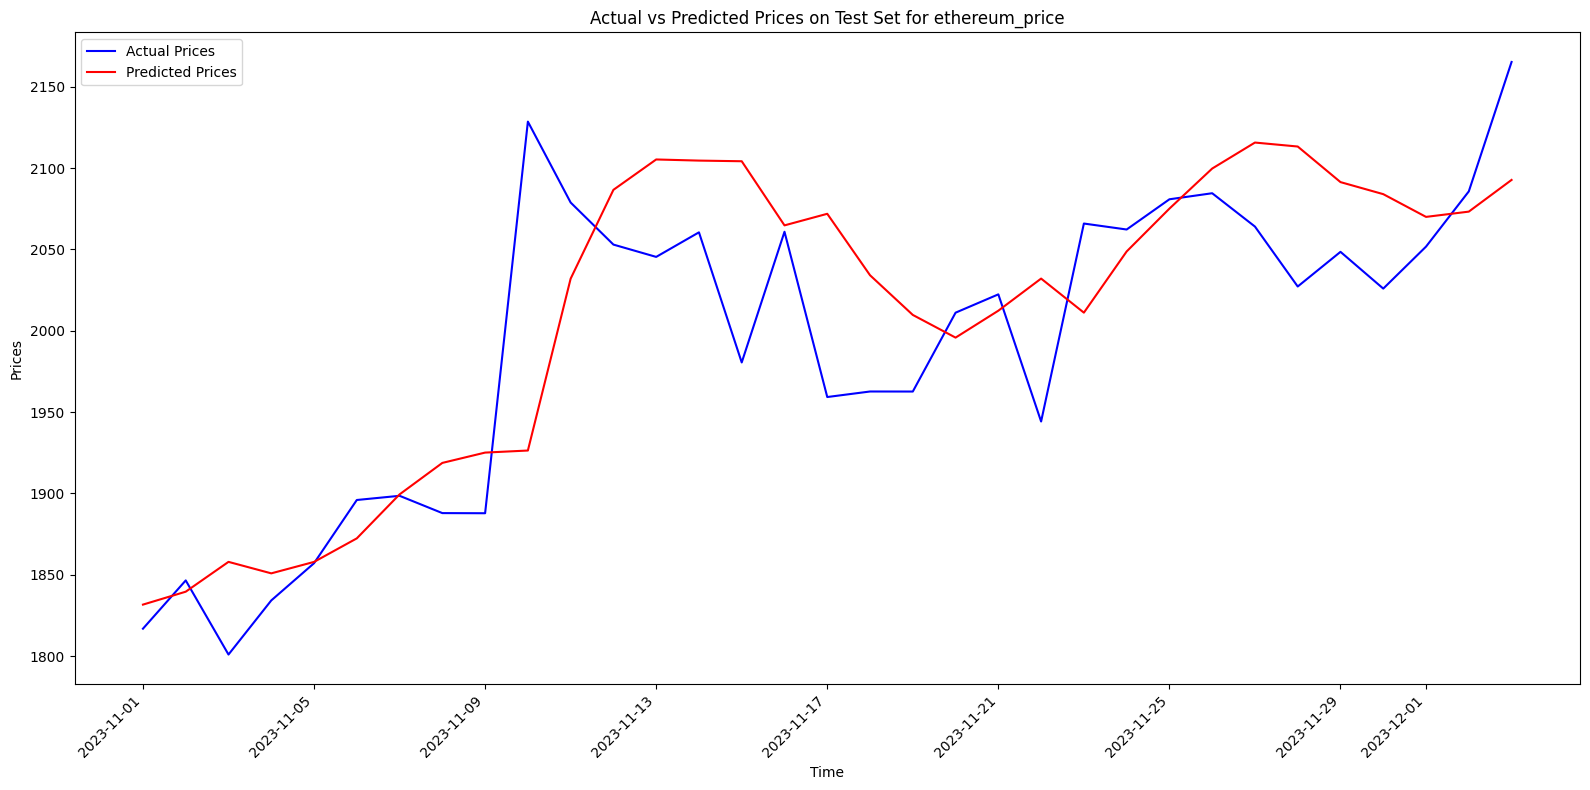

Epoch 1/50
46/46 [==============================] - 2s 6ms/step - loss: 0.0971
Epoch 2/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 3/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 4/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 5/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 6/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 7/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 8/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0039
Epoch 9/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 10/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0039
Epoch 11/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 12/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0039
Epoch 13/50
46/46 [==============================

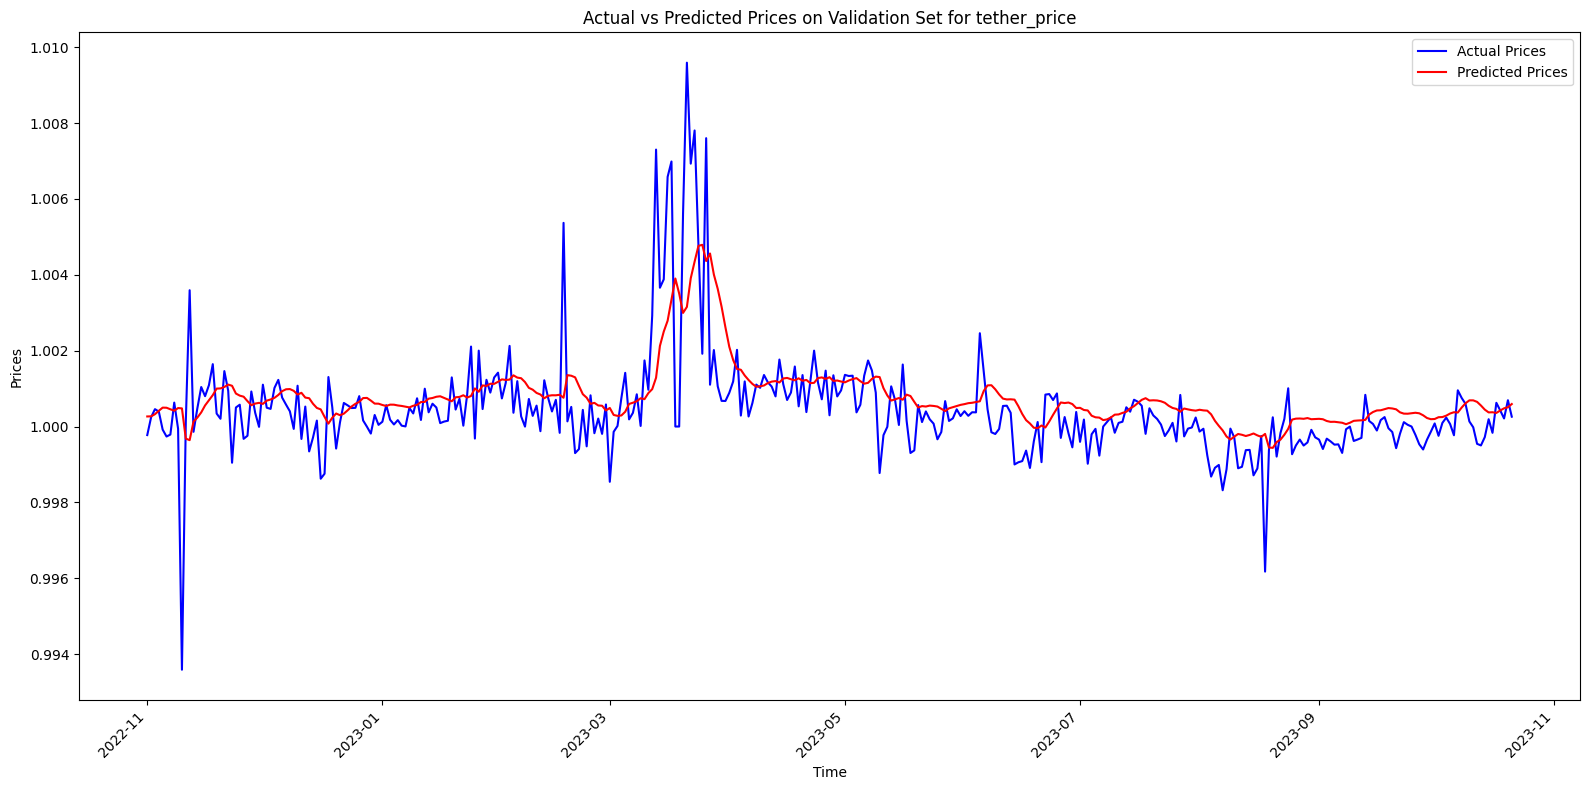

Epoch 1/50
57/57 [==============================] - 2s 6ms/step - loss: 0.0331
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 7/50
57/57 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 8/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 9/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 10/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 11/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 12/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 13/50
57/57 [==============================

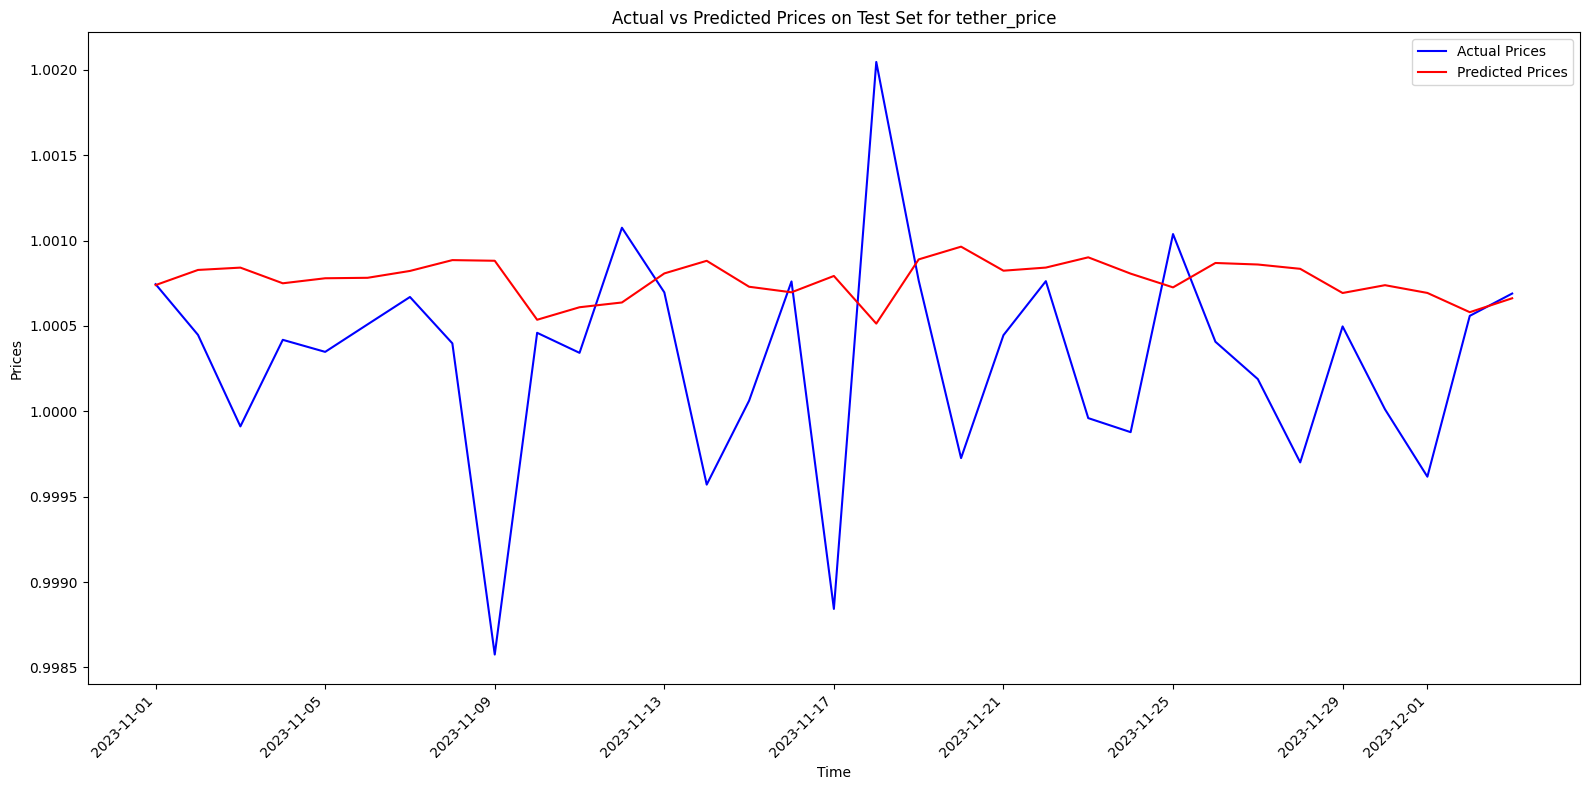

Epoch 1/50
46/46 [==============================] - 2s 7ms/step - loss: 0.0295
Epoch 2/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 3/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 4/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 5/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 6/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 7/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 8/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 9/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 10/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 11/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 12/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 13/50
46/46 [==============================

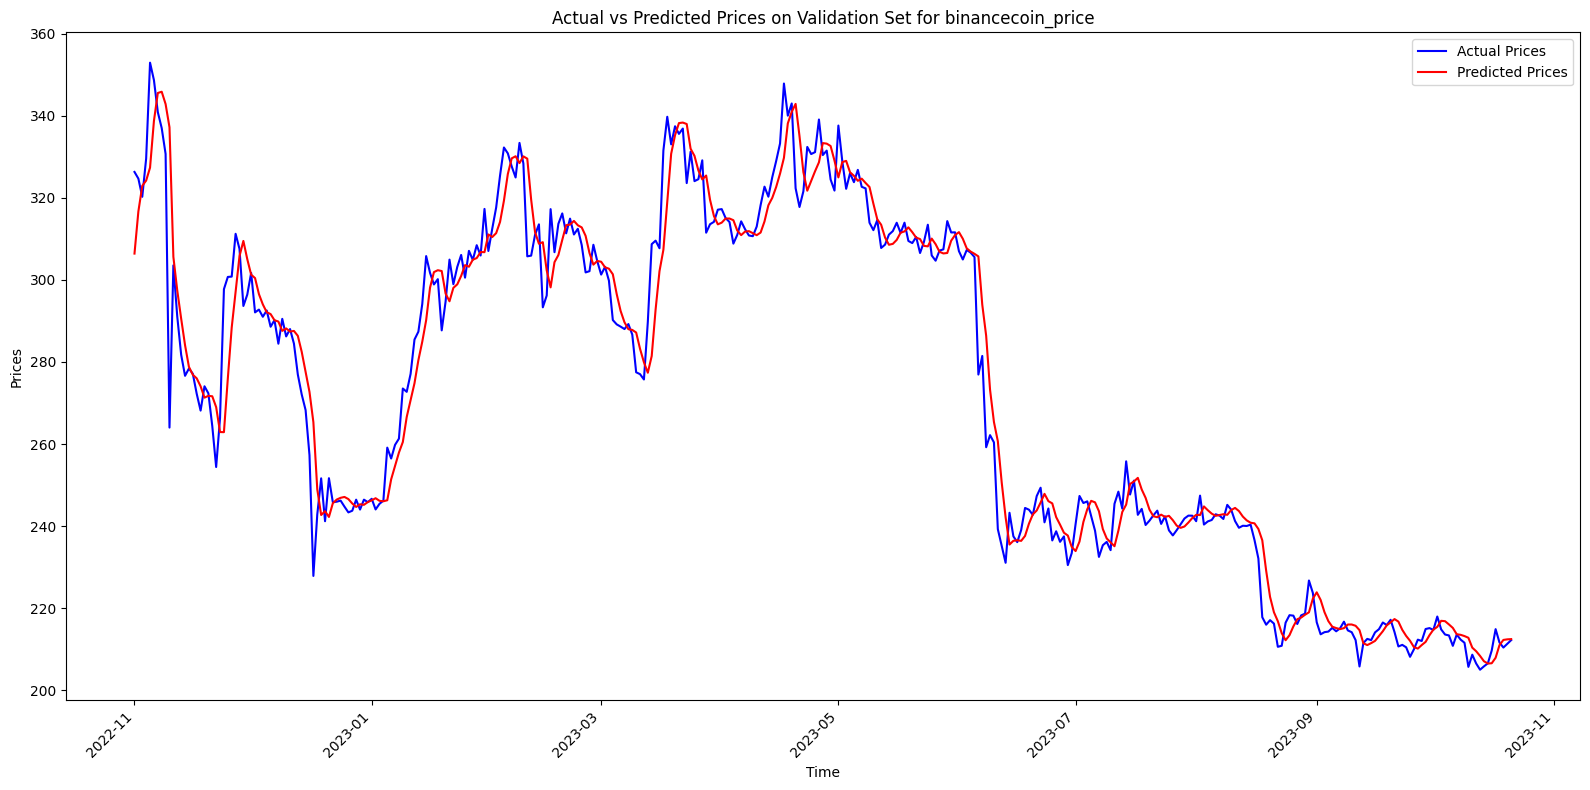

Epoch 1/50
57/57 [==============================] - 2s 7ms/step - loss: 0.0340
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 8/50
57/57 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 9/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 10/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 11/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 12/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 13/50
57/57 [==============================

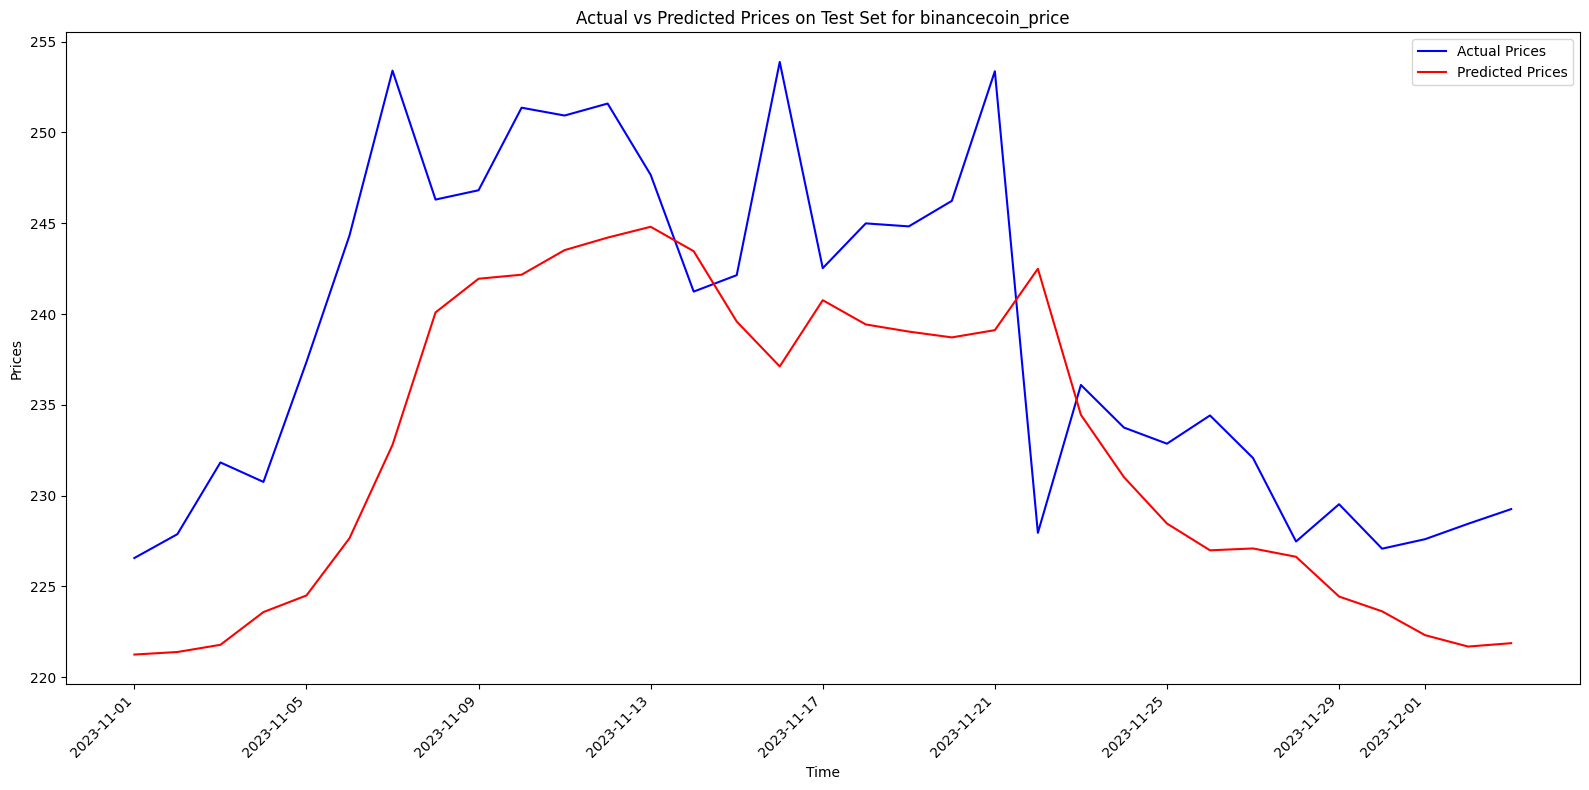

Epoch 1/50
46/46 [==============================] - 2s 6ms/step - loss: 0.0343
Epoch 2/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 3/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 4/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 5/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 6/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 7/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 8/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 9/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 10/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 11/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 12/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 13/50
46/46 [==============================

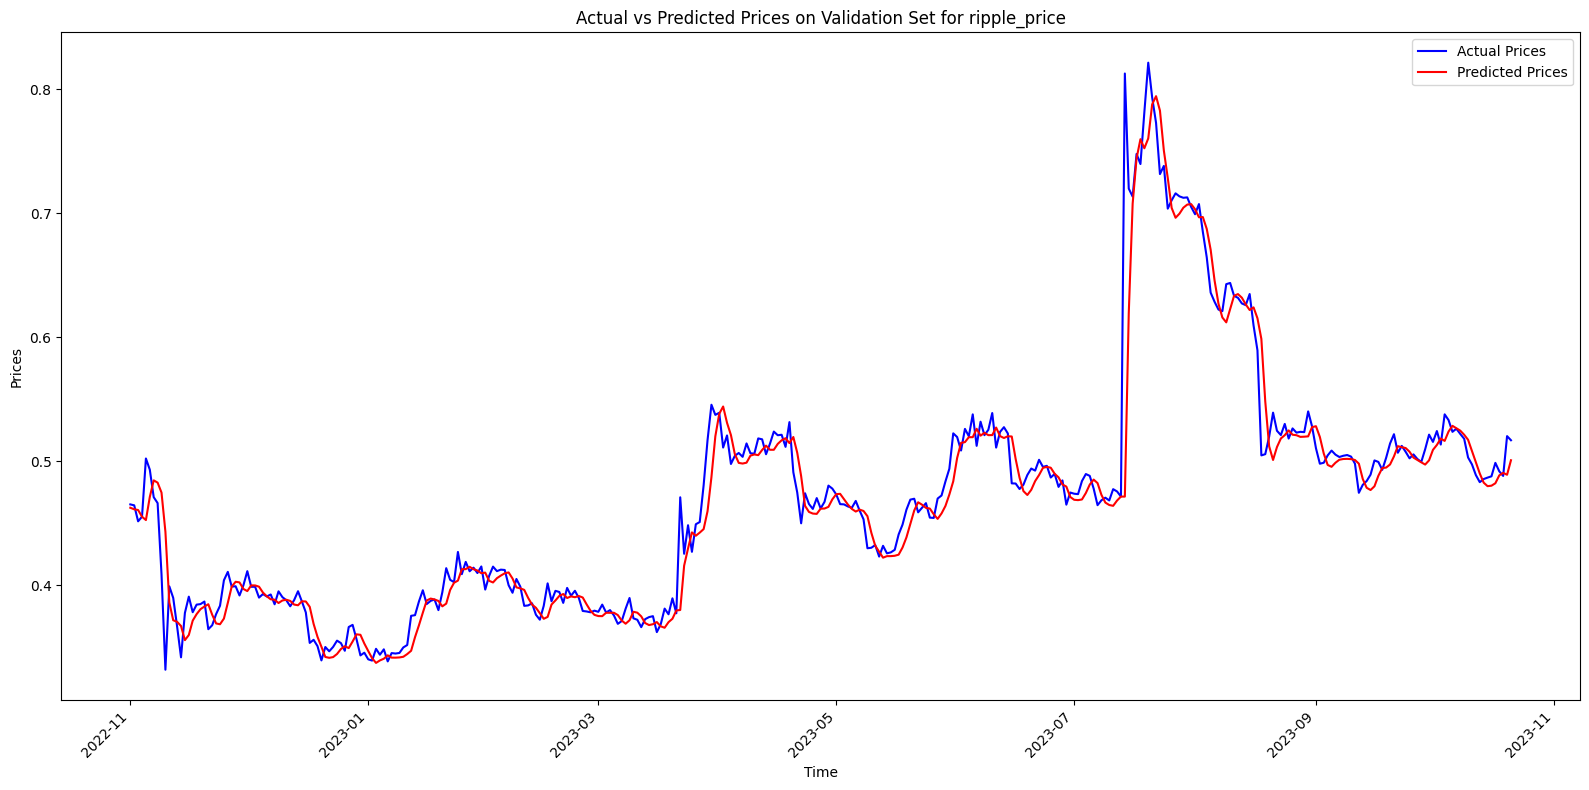

Epoch 1/50
57/57 [==============================] - 3s 7ms/step - loss: 0.0068
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 5/50
57/57 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 8/50
57/57 [==============================] - 0s 6ms/step - loss: 9.7842e-04
Epoch 9/50
57/57 [==============================] - 0s 6ms/step - loss: 9.2901e-04
Epoch 10/50
57/57 [==============================] - 0s 6ms/step - loss: 8.9489e-04
Epoch 11/50
57/57 [==============================] - 0s 7ms/step - loss: 7.9870e-04
Epoch 12/50
57/57 [==============================] - 0s 7ms/step - loss: 8.9582e-04
Epoch 13/50
57/57 [==========

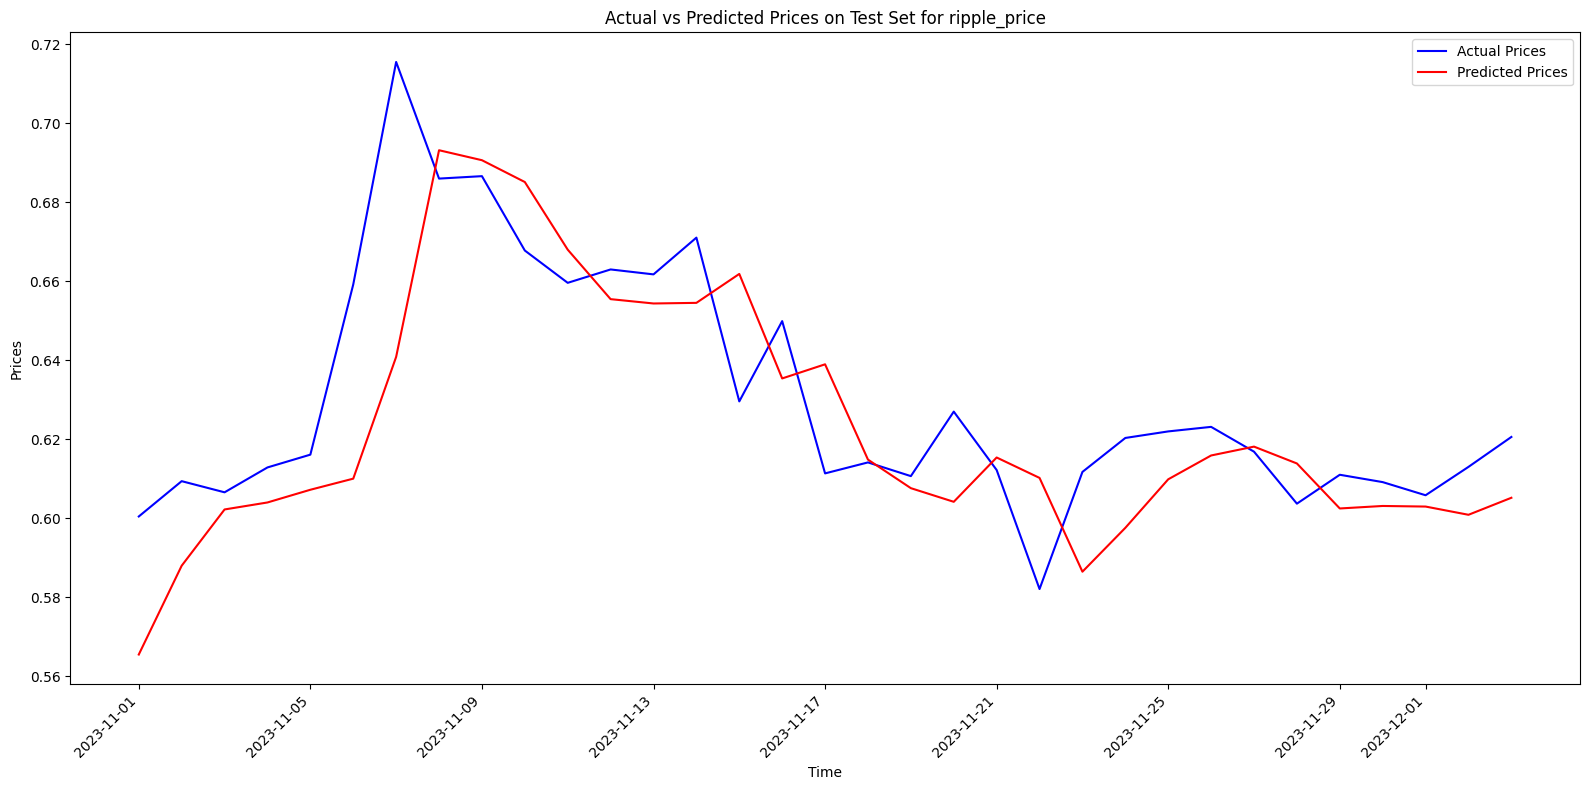

In [59]:
crypto_columns = ['bitcoin_price', 'ethereum_price', 'tether_price', 'binancecoin_price', 'ripple_price']

for col in crypto_columns:
    train_and_evaluate_lstm_model(final_df, new_crypto_df, col)

##### LSTM on Stocks

Epoch 1/50
46/46 [==============================] - 4s 12ms/step - loss: 0.0403
Epoch 2/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0021
Epoch 3/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 4/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 5/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 6/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 7/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 8/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 9/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 10/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 11/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 12/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 13/50
46/46 [=======================

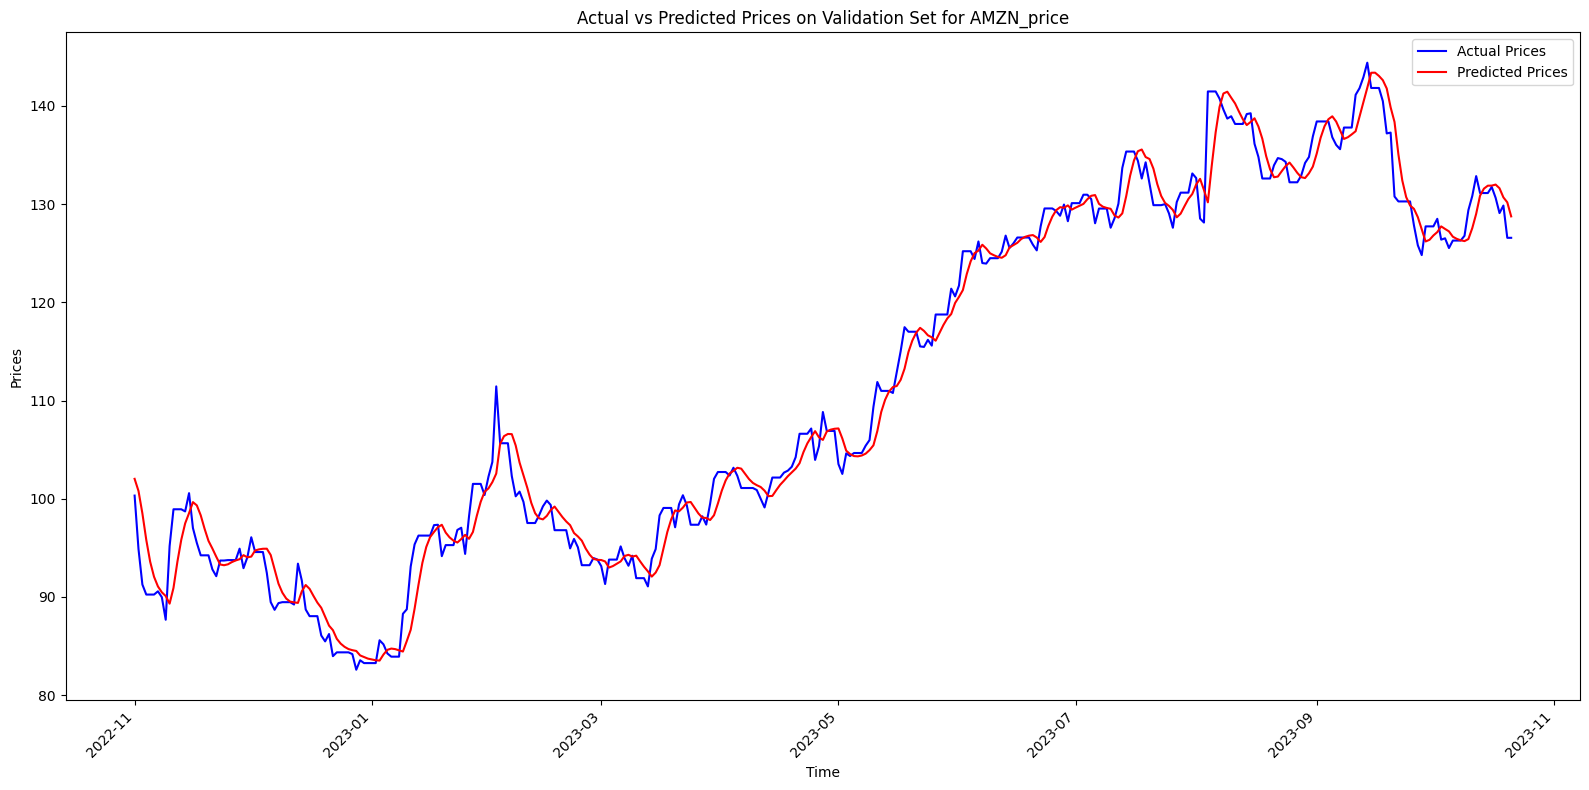

Epoch 1/50
57/57 [==============================] - 2s 6ms/step - loss: 0.0594
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 8/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 9/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 10/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 11/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 12/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 13/50
57/57 [==============================

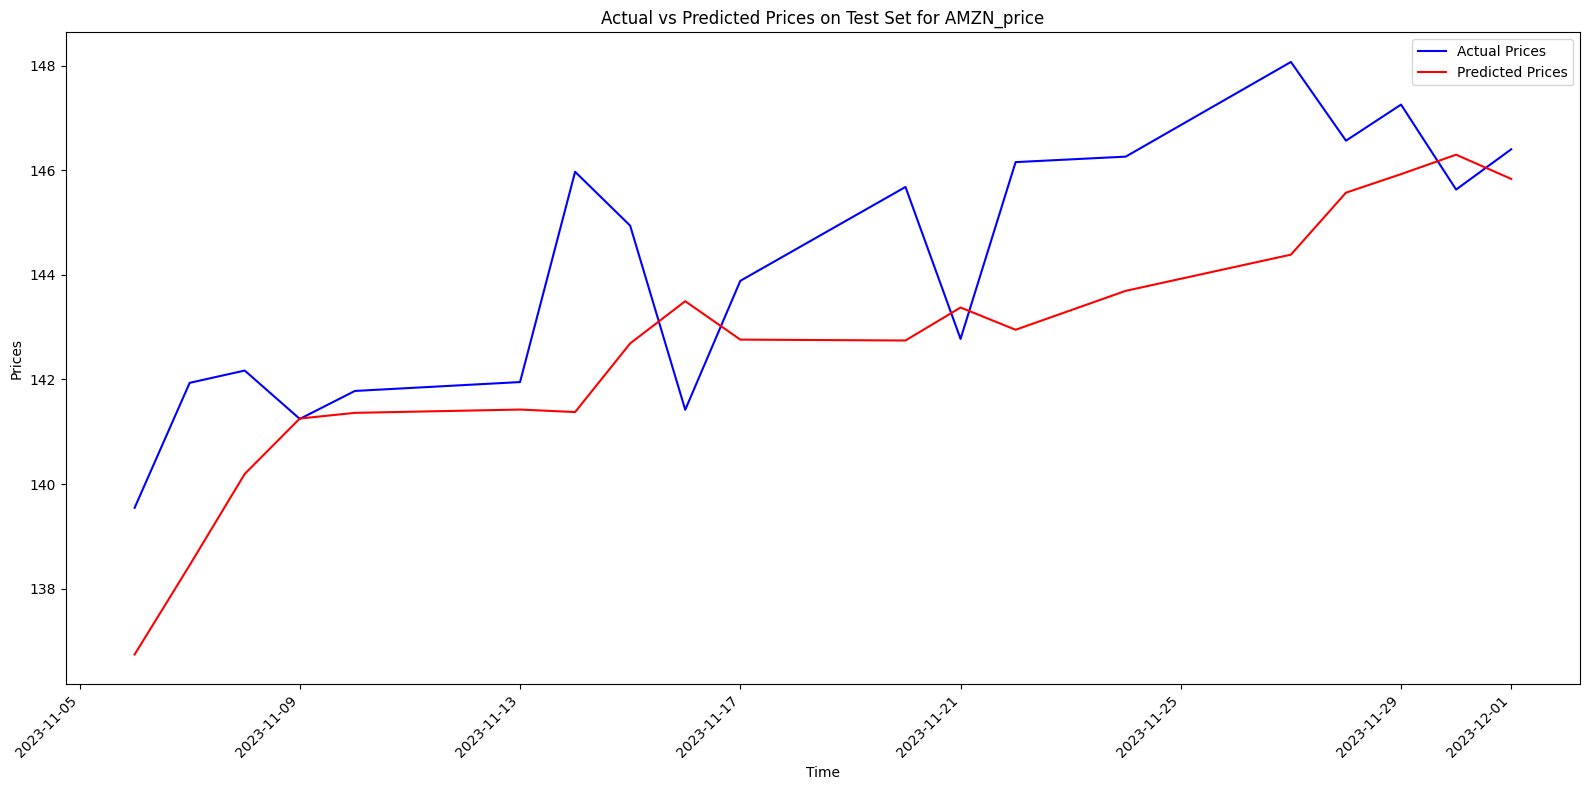

Epoch 1/50
46/46 [==============================] - 2s 6ms/step - loss: 0.0574
Epoch 2/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 3/50
46/46 [==============================] - 0s 6ms/step - loss: 7.6146e-04
Epoch 4/50
46/46 [==============================] - 0s 5ms/step - loss: 7.5495e-04
Epoch 5/50
46/46 [==============================] - 0s 6ms/step - loss: 7.2123e-04
Epoch 6/50
46/46 [==============================] - 0s 8ms/step - loss: 6.8187e-04
Epoch 7/50
46/46 [==============================] - 0s 8ms/step - loss: 6.6808e-04
Epoch 8/50
46/46 [==============================] - 0s 8ms/step - loss: 6.5300e-04
Epoch 9/50
46/46 [==============================] - 0s 8ms/step - loss: 6.5045e-04
Epoch 10/50
46/46 [==============================] - 0s 8ms/step - loss: 6.5156e-04
Epoch 11/50
46/46 [==============================] - 0s 8ms/step - loss: 6.5001e-04
Epoch 12/50
46/46 [==============================] - 0s 10ms/step - loss: 6.5947e-04
Epoch 13

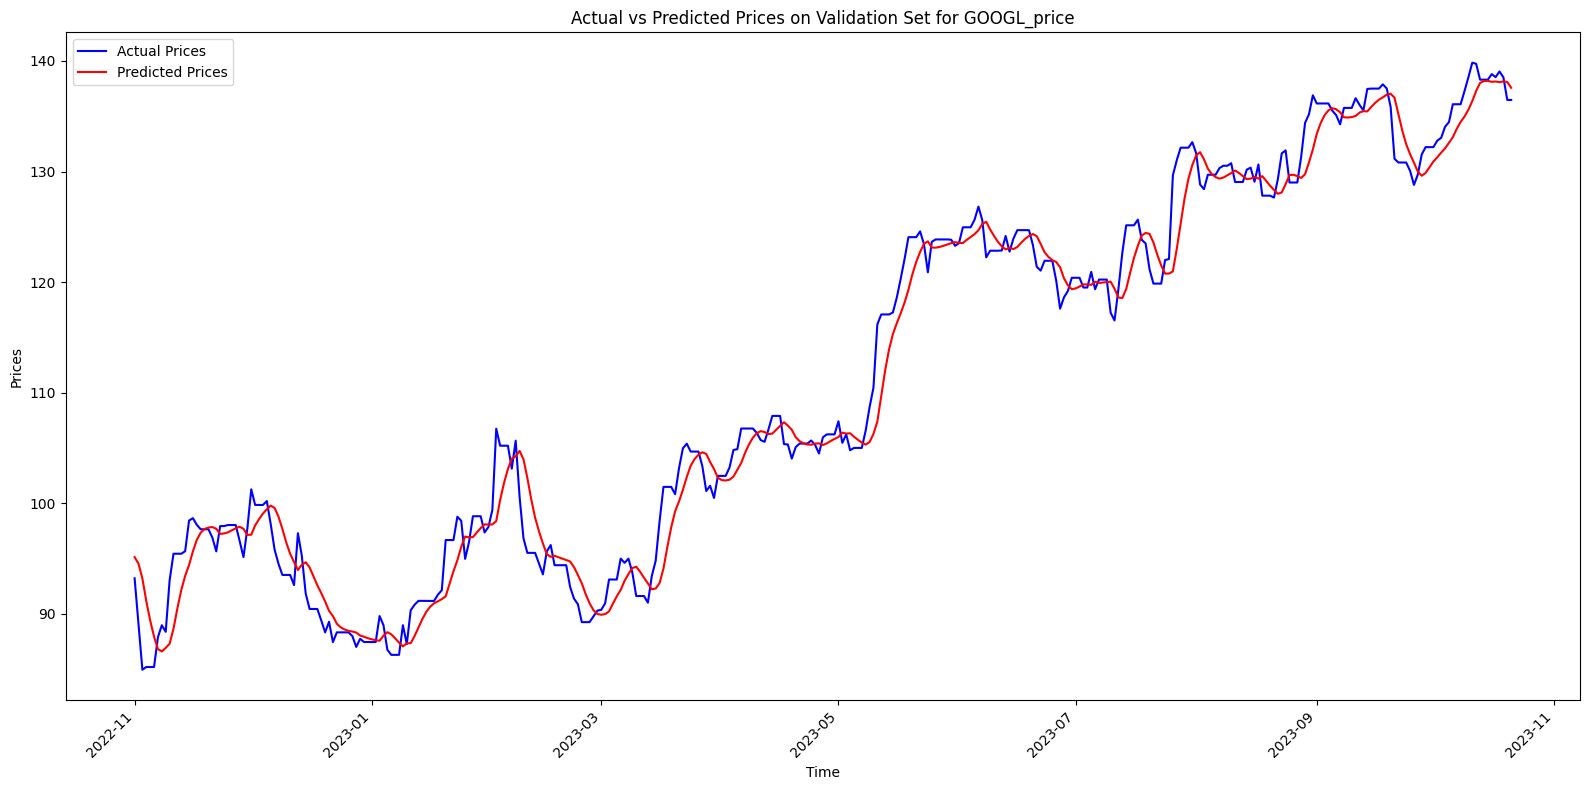

Epoch 1/50
57/57 [==============================] - 2s 6ms/step - loss: 0.0298
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 9.0317e-04
Epoch 3/50
57/57 [==============================] - 0s 7ms/step - loss: 7.4891e-04
Epoch 4/50
57/57 [==============================] - 0s 7ms/step - loss: 7.0531e-04
Epoch 5/50
57/57 [==============================] - 0s 7ms/step - loss: 6.8568e-04
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 6.7546e-04
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 6.7389e-04
Epoch 8/50
57/57 [==============================] - 0s 6ms/step - loss: 6.4689e-04
Epoch 9/50
57/57 [==============================] - 0s 6ms/step - loss: 6.3833e-04
Epoch 10/50
57/57 [==============================] - 0s 6ms/step - loss: 6.3057e-04
Epoch 11/50
57/57 [==============================] - 0s 6ms/step - loss: 6.1868e-04
Epoch 12/50
57/57 [==============================] - 0s 7ms/step - loss: 6.0725e-04
Epoch

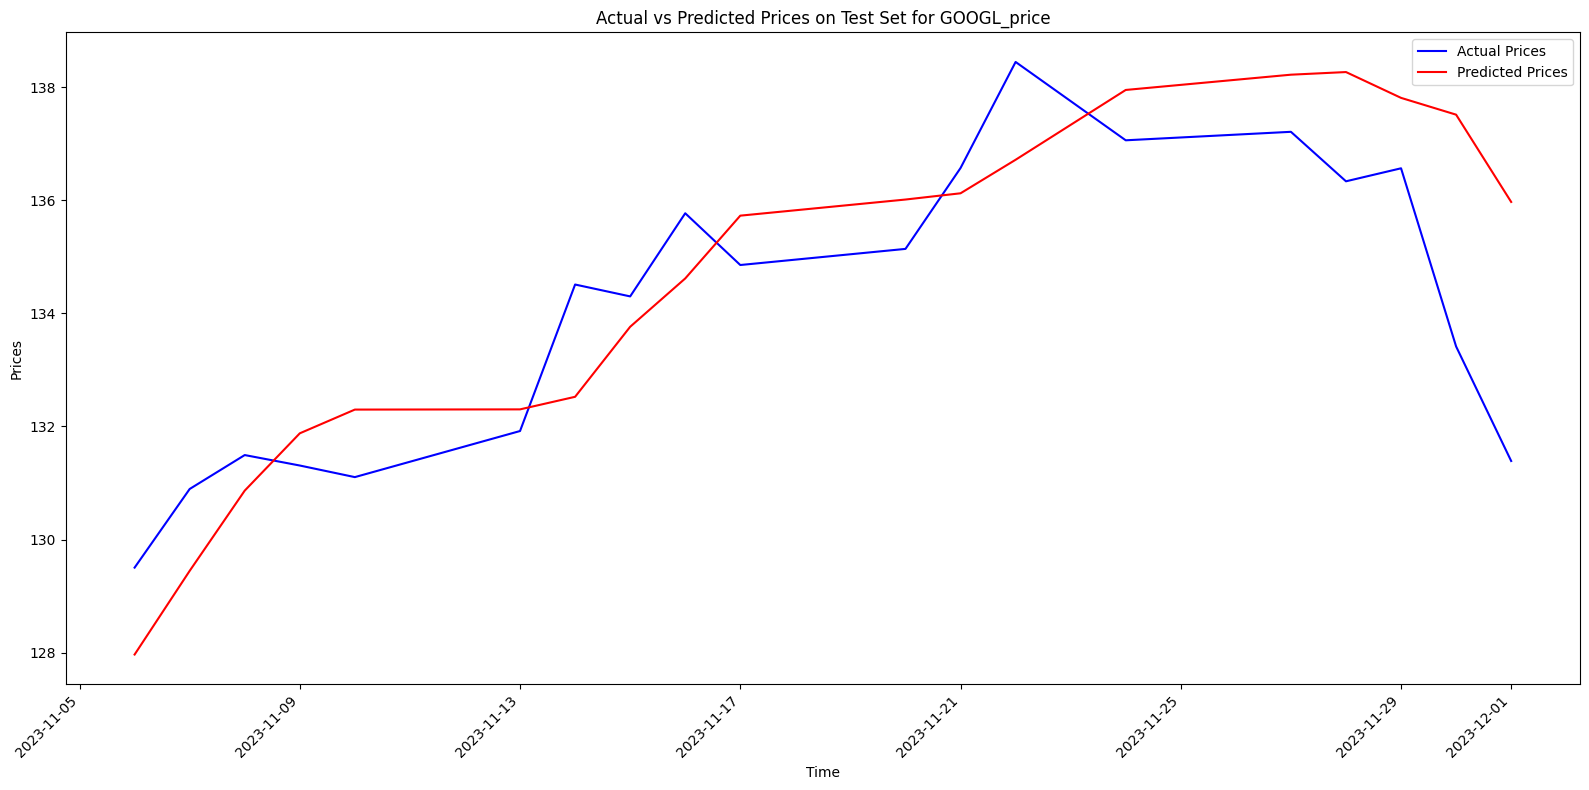

Epoch 1/50
46/46 [==============================] - 2s 6ms/step - loss: 0.0358
Epoch 2/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 3/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 4/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 5/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 6/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 7/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 8/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 9/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 10/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 11/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 12/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 13/50
46/46 [==============================

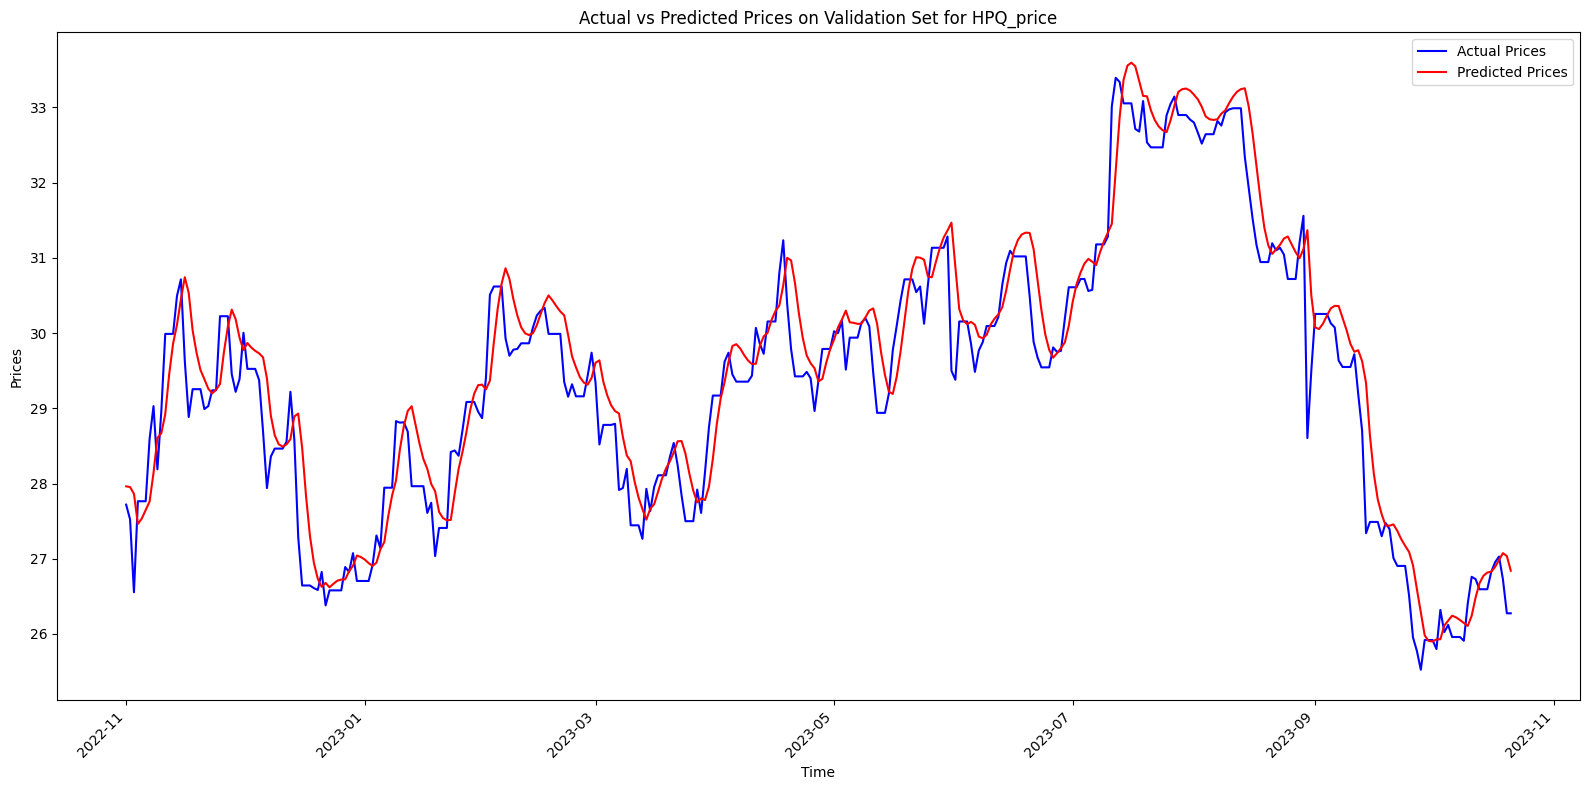

Epoch 1/50
57/57 [==============================] - 3s 6ms/step - loss: 0.0661
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 8/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 9/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 10/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 11/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 12/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 13/50
57/57 [==============================

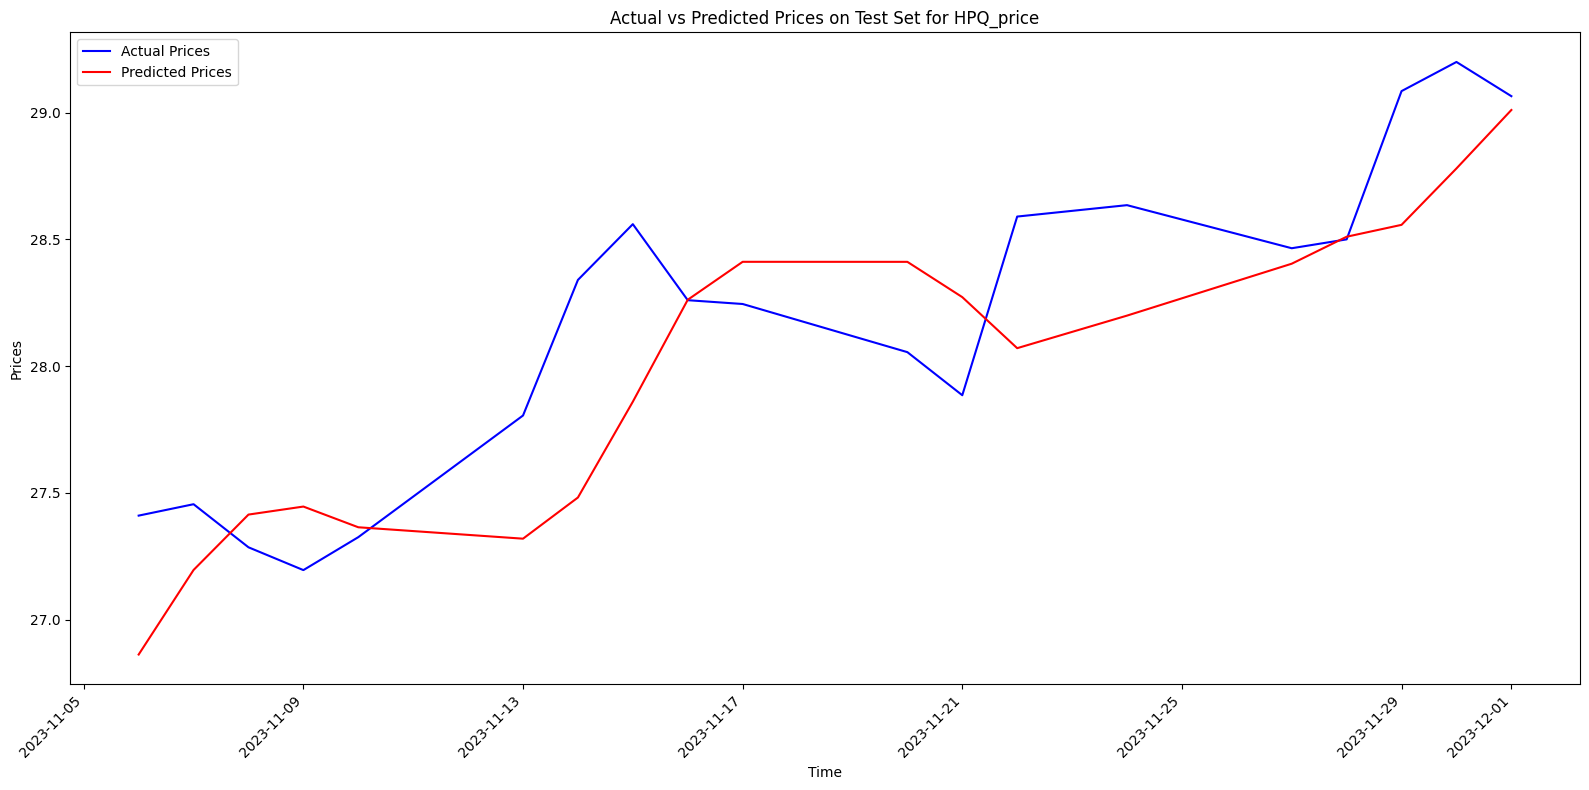

Epoch 1/50
46/46 [==============================] - 2s 6ms/step - loss: 0.0366
Epoch 2/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 3/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 4/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 5/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 6/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 7/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 8/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 9/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 10/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 11/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 12/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 13/50
46/46 [==============================

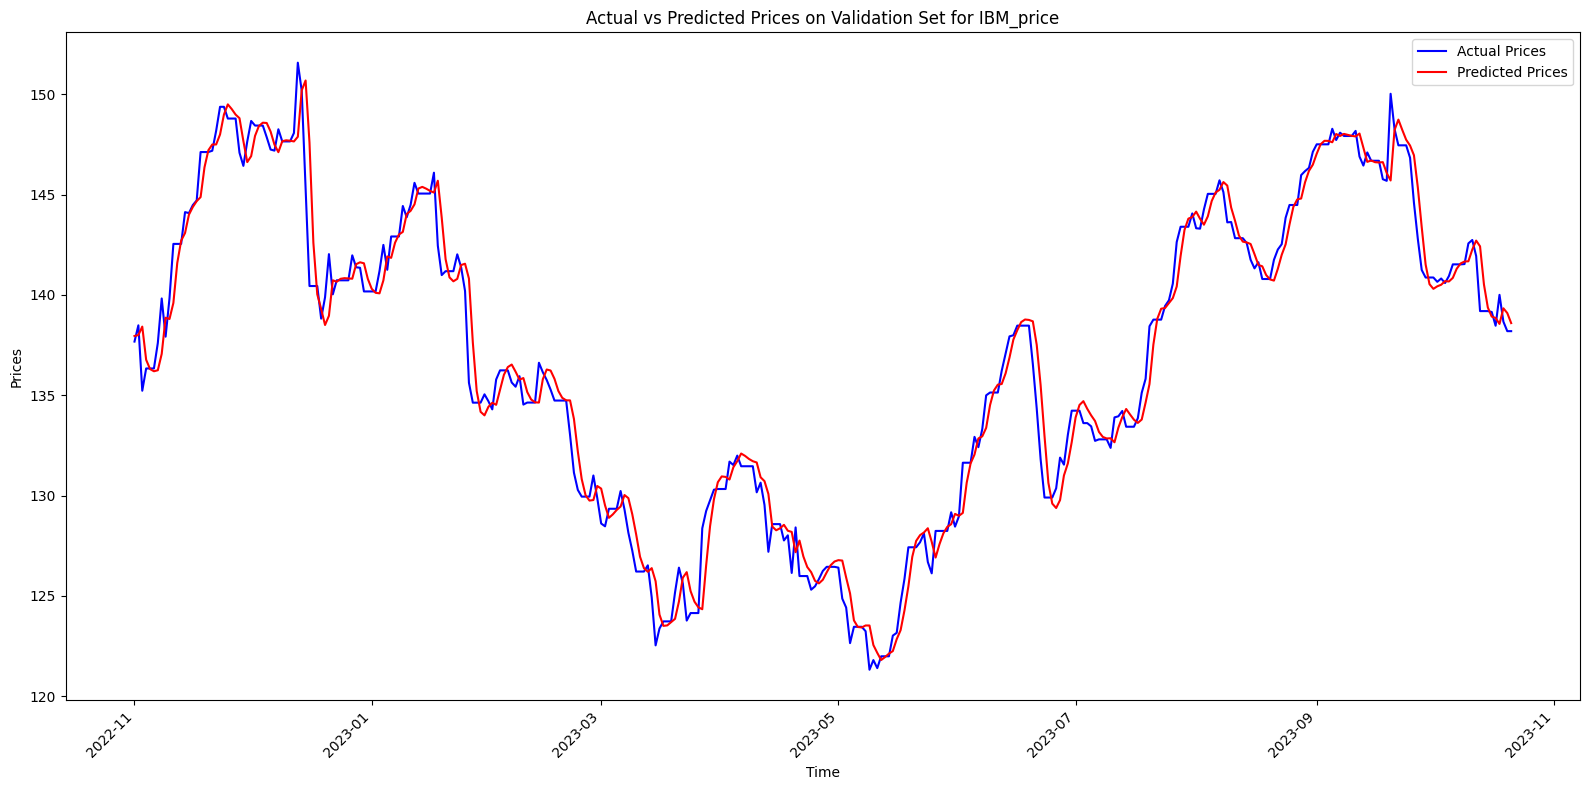

Epoch 1/50
57/57 [==============================] - 2s 6ms/step - loss: 0.0454
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 6/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 7/50
57/57 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 8/50
57/57 [==============================] - 1s 10ms/step - loss: 0.0023
Epoch 9/50
57/57 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 10/50
57/57 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 11/50
57/57 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 12/50
57/57 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 13/50
57/57 [=============================

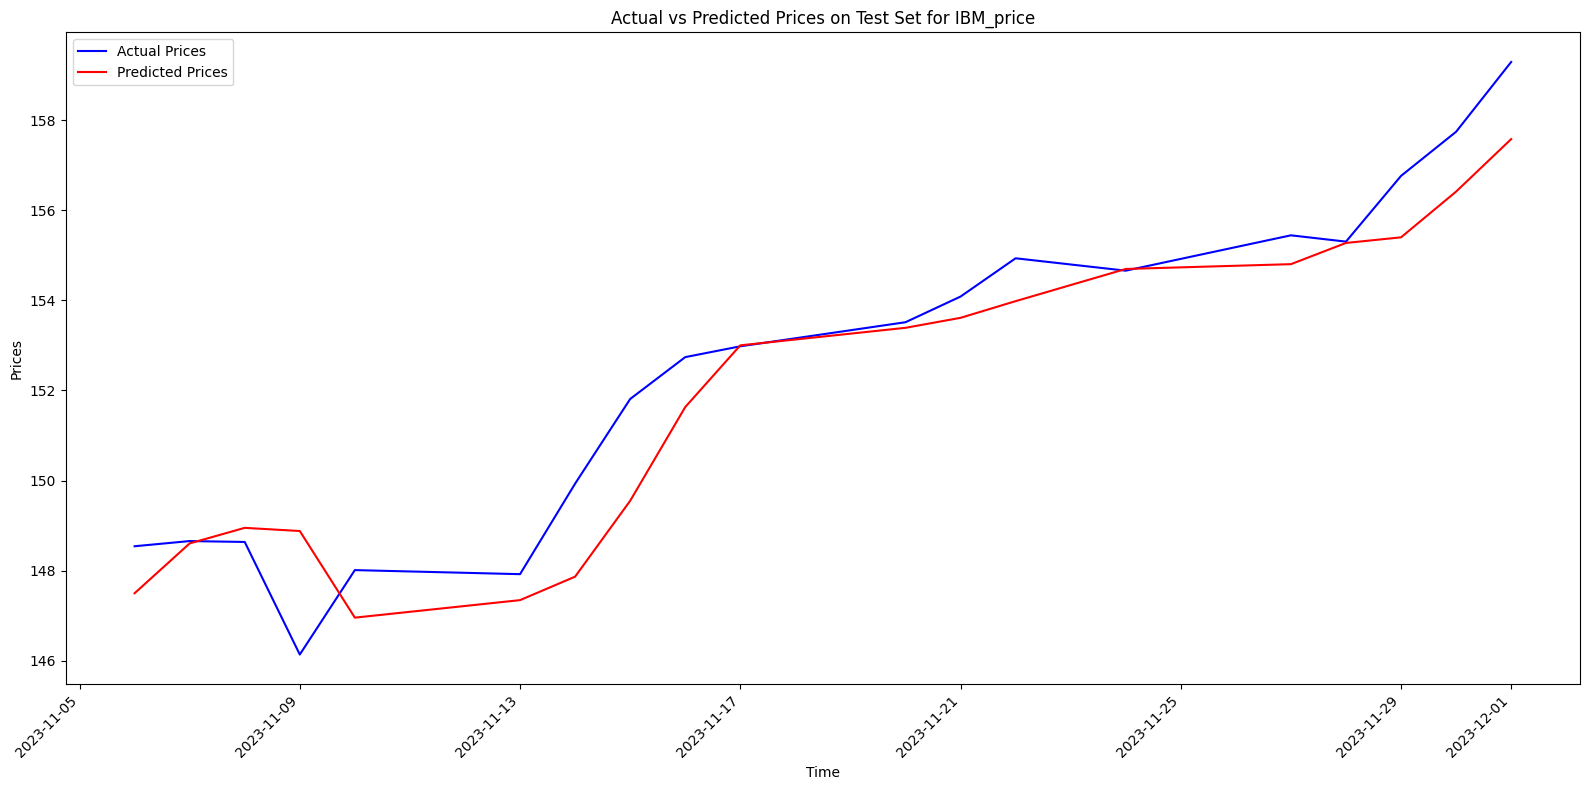

Epoch 1/50
46/46 [==============================] - 3s 7ms/step - loss: 0.0460
Epoch 2/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 3/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 4/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 5/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 6/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 7/50
46/46 [==============================] - 0s 6ms/step - loss: 9.8471e-04
Epoch 8/50
46/46 [==============================] - 0s 6ms/step - loss: 9.6674e-04
Epoch 9/50
46/46 [==============================] - 0s 6ms/step - loss: 9.4176e-04
Epoch 10/50
46/46 [==============================] - 0s 6ms/step - loss: 9.4186e-04
Epoch 11/50
46/46 [==============================] - 0s 6ms/step - loss: 9.1299e-04
Epoch 12/50
46/46 [==============================] - 0s 6ms/step - loss: 9.0145e-04
Epoch 13/50
46/46 [======

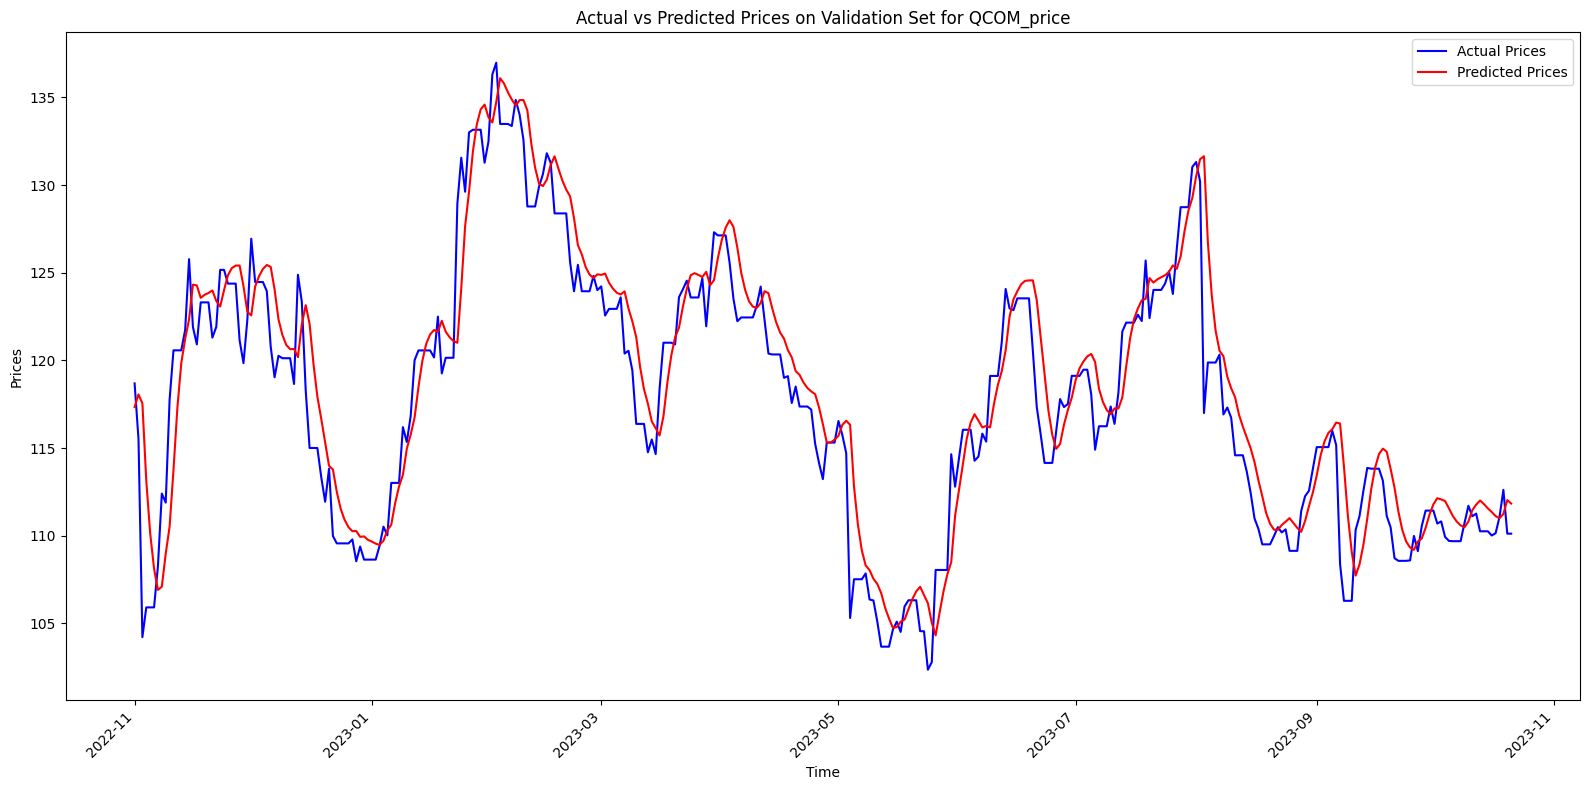

Epoch 1/50
57/57 [==============================] - 2s 7ms/step - loss: 0.0494
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 5/50
57/57 [==============================] - 0s 7ms/step - loss: 9.8136e-04
Epoch 6/50
57/57 [==============================] - 0s 8ms/step - loss: 9.8114e-04
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 9.3027e-04
Epoch 8/50
57/57 [==============================] - 0s 6ms/step - loss: 9.0991e-04
Epoch 9/50
57/57 [==============================] - 0s 6ms/step - loss: 8.9587e-04
Epoch 10/50
57/57 [==============================] - 0s 7ms/step - loss: 8.7172e-04
Epoch 11/50
57/57 [==============================] - 0s 6ms/step - loss: 8.5596e-04
Epoch 12/50
57/57 [==============================] - 0s 6ms/step - loss: 8.5135e-04
Epoch 13/50
57/57

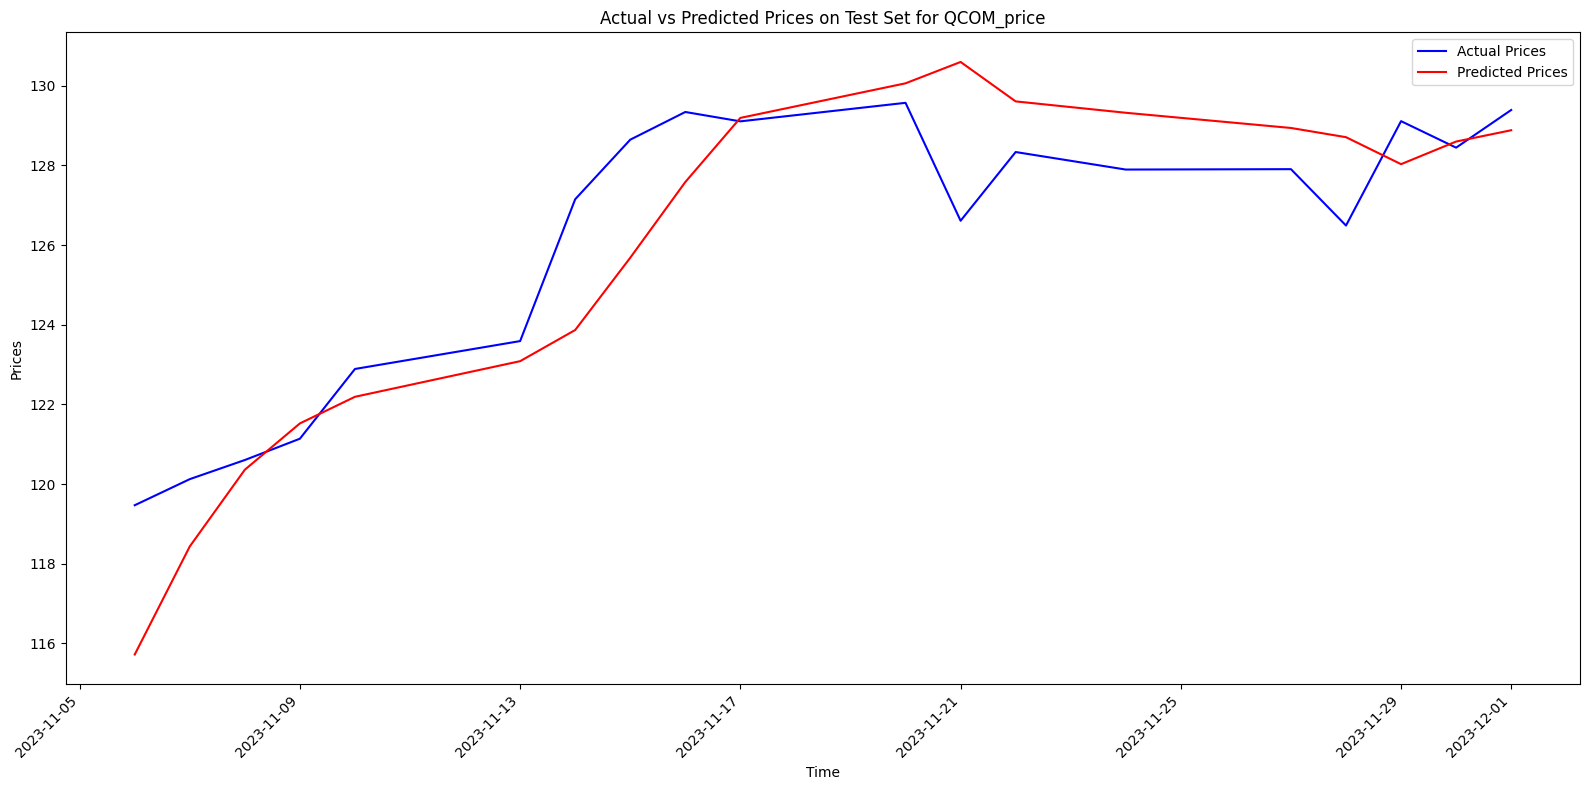

In [60]:
stocks = ["AMZN_price","GOOGL_price","HPQ_price","IBM_price","QCOM_price"]

for col in stocks:
    train_and_evaluate_lstm_model(final_df, new_stocks_df, col)

##### LSTM On Gold

Epoch 1/50
46/46 [==============================] - 2s 7ms/step - loss: 0.0529
Epoch 2/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 3/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 4/50
46/46 [==============================] - 0s 6ms/step - loss: 9.2471e-04
Epoch 5/50
46/46 [==============================] - 0s 6ms/step - loss: 9.0486e-04
Epoch 6/50
46/46 [==============================] - 0s 6ms/step - loss: 8.9627e-04
Epoch 7/50
46/46 [==============================] - 0s 6ms/step - loss: 8.9489e-04
Epoch 8/50
46/46 [==============================] - 0s 6ms/step - loss: 8.8063e-04
Epoch 9/50
46/46 [==============================] - 0s 6ms/step - loss: 8.7404e-04
Epoch 10/50
46/46 [==============================] - 0s 7ms/step - loss: 8.7290e-04
Epoch 11/50
46/46 [==============================] - 0s 5ms/step - loss: 8.3811e-04
Epoch 12/50
46/46 [==============================] - 0s 6ms/step - loss: 8.4091e-04
Epoch 13/50
4

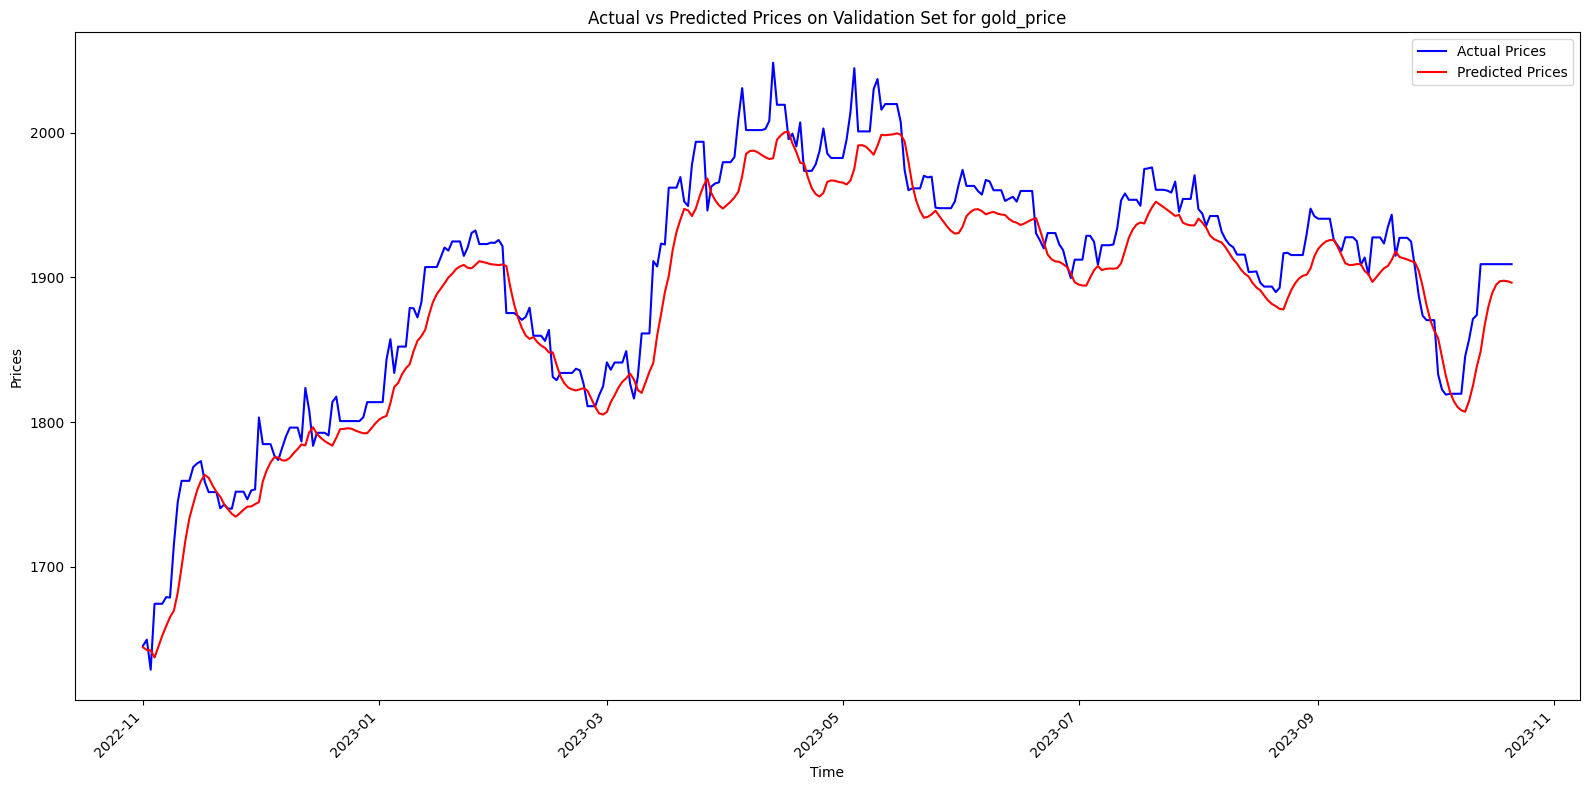

Epoch 1/50
57/57 [==============================] - 3s 6ms/step - loss: 0.0447
Epoch 2/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 9.6283e-04
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 8.8906e-04
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 8.8170e-04
Epoch 6/50
57/57 [==============================] - 0s 7ms/step - loss: 8.7661e-04
Epoch 7/50
57/57 [==============================] - 0s 7ms/step - loss: 8.6101e-04
Epoch 8/50
57/57 [==============================] - 0s 6ms/step - loss: 8.4003e-04
Epoch 9/50
57/57 [==============================] - 0s 6ms/step - loss: 8.3783e-04
Epoch 10/50
57/57 [==============================] - 0s 6ms/step - loss: 8.2724e-04
Epoch 11/50
57/57 [==============================] - 0s 6ms/step - loss: 8.1890e-04
Epoch 12/50
57/57 [==============================] - 0s 6ms/step - loss: 7.9634e-04
Epoch 13/

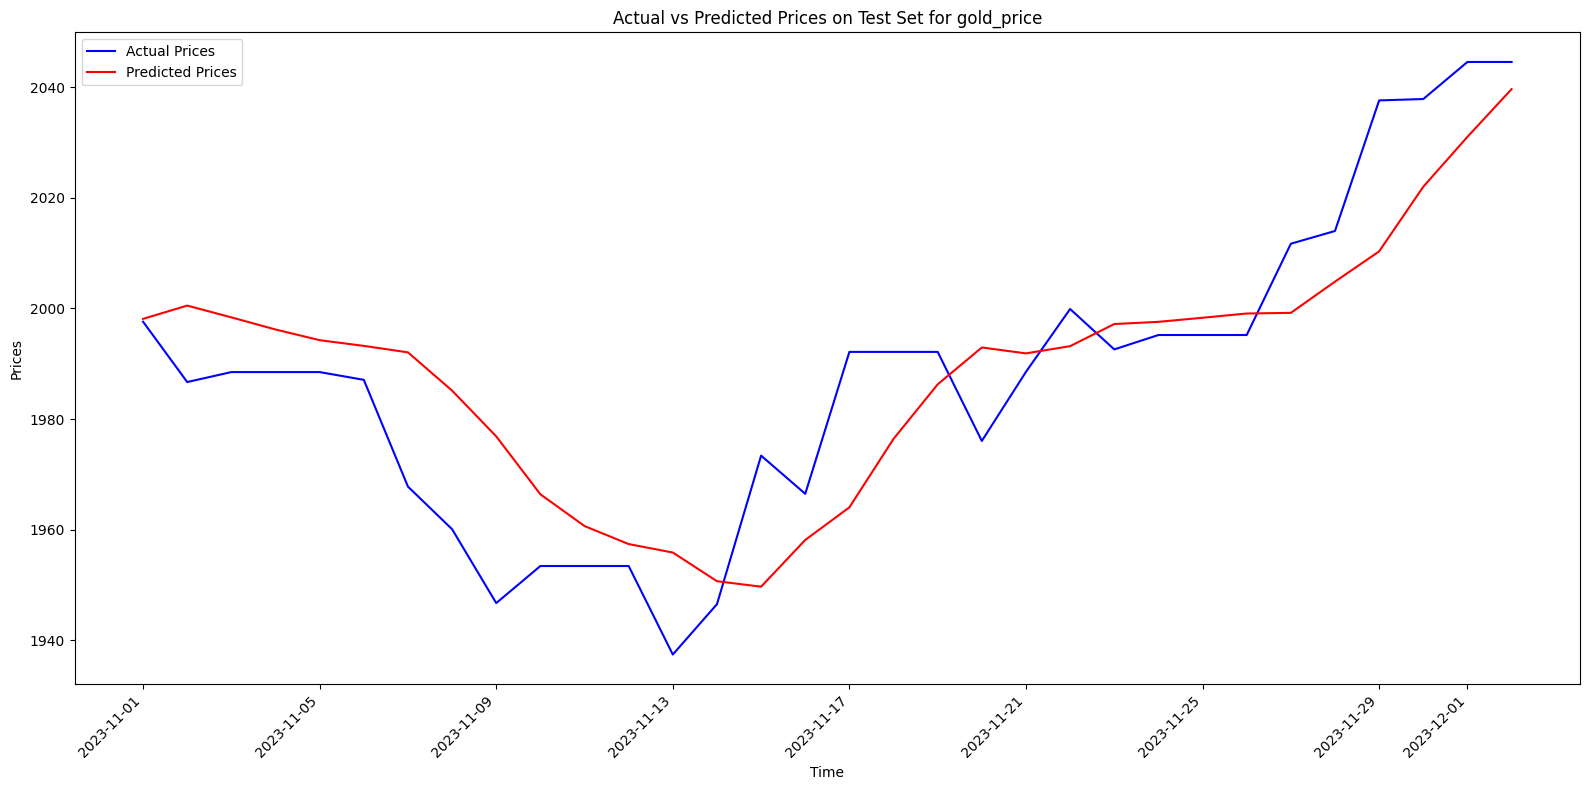

In [61]:
train_and_evaluate_lstm_model(final_df, new_gold_df, 'gold_price')